**Developing Machine Learning Predictive Models to Understand Consumers Churn for E-Commerce businesses**

In [1]:
!pip install --upgrade pandas numpy matplotlib
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.3 M

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from pycaret.classification import *
%matplotlib inline

**Importing the Dataset**

In [ ]:
dataset = pd.read_excel('/content/ECommerceDataset.xlsx', sheet_name = 1)

**Display records**

In [ ]:
dataset.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

**Understanding the dataset**

In [ ]:
dataset.shape

(5630, 20)

In [ ]:
dataset.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [ ]:
# specifyies types of variables
dataset.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
dataset.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
# list of columns
columns_list = dataset.columns.to_list()
columns_list

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
# dataframe to display non numeric attributes
dataset.select_dtypes(exclude= np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
(dataset.describe(include='O')
    .style
    .background_gradient(axis=None, cmap='viridis', vmin=0, vmax=9000)
)


In [ ]:
for col in dataset.select_dtypes(include='object').columns:
    print(f"{col} : {dataset[col].unique()}")
    print(dataset[col].value_counts())
    print("-------------------------------------------------")


PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
-------------------------------------------------
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
-------------------------------------------------
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
-------------------------------------------------
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: 

In [ ]:
numeric_columns = [col for col, dtype in dataset.dtypes.items() if np.issubdtype(dtype, np.number)]
numeric_columns

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std', '50%', 'max'], cmap='viridis')

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

In [ ]:
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col} : {dataset[col].unique()}")
    print(dataset[col].value_counts())
    print("-------------------------------------------------")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64
-------------------------------------------------
Churn : [1 0]
0    4682
1     948
Name: Churn, dtype: int64
-------------------------------------------------
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

In [ ]:
# Replace 'Phone' in 'PreferredLoginDevice' column with 'Mobile Phone'
dataset['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)

# Replace 'Mobile' in 'PreferedOrderCat' column with 'Mobile Phone'
dataset['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace=True)


In [ ]:
dataset['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
dataset['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace=True)
dataset['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace=True)

In [ ]:
dataset['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
dataset.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
df = dataset.copy()
for col in df.columns:
  if col == 'CustomerID':
    continue

  else:
    if df[col].dtype == 'int':  # checking for integer types
      df[col] = dataset[col].astype(str) # converting integer columns to string type

df.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# categorical columns after converting getting info of obejcts from the table
(df.describe(include='O').style.background_gradient(axis=None, cmap='Blues', vmin=0, vmax=9000))

In [ ]:
# Transposing datafarme for understanding data after converting
df.describe().T.style.bar(subset = ['mean']).background_gradient(subset=['std', '50%', 'max'])

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
# Code to calculate missing values and percentages
grouped_data = []
for col in dataset.columns:
    n_missing = dataset[col].isnull().sum()
    percentage = n_missing / dataset.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create DataFrame from the grouped data
grouped_dataset = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Grouping by 'column' and summarizing missing value counts and percentages
result = grouped_dataset.groupby('column').agg({'n_missing': 'sum', 'percentage': 'mean'})

# Display the result
print(result)


                             n_missing  percentage
column                                            
CashbackAmount                       0    0.000000
Churn                                0    0.000000
CityTier                             0    0.000000
Complain                             0    0.000000
CouponUsed                         256    4.547069
CustomerID                           0    0.000000
DaySinceLastOrder                  307    5.452931
Gender                               0    0.000000
HourSpendOnApp                     255    4.529307
MaritalStatus                        0    0.000000
NumberOfAddress                      0    0.000000
NumberOfDeviceRegistered             0    0.000000
OrderAmountHikeFromlastYear        265    4.706927
OrderCount                         258    4.582593
PreferedOrderCat                     0    0.000000
PreferredLoginDevice                 0    0.000000
PreferredPaymentMode                 0    0.000000
SatisfactionScore              

## **`EDA (Exploratory Data Analysis)`**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

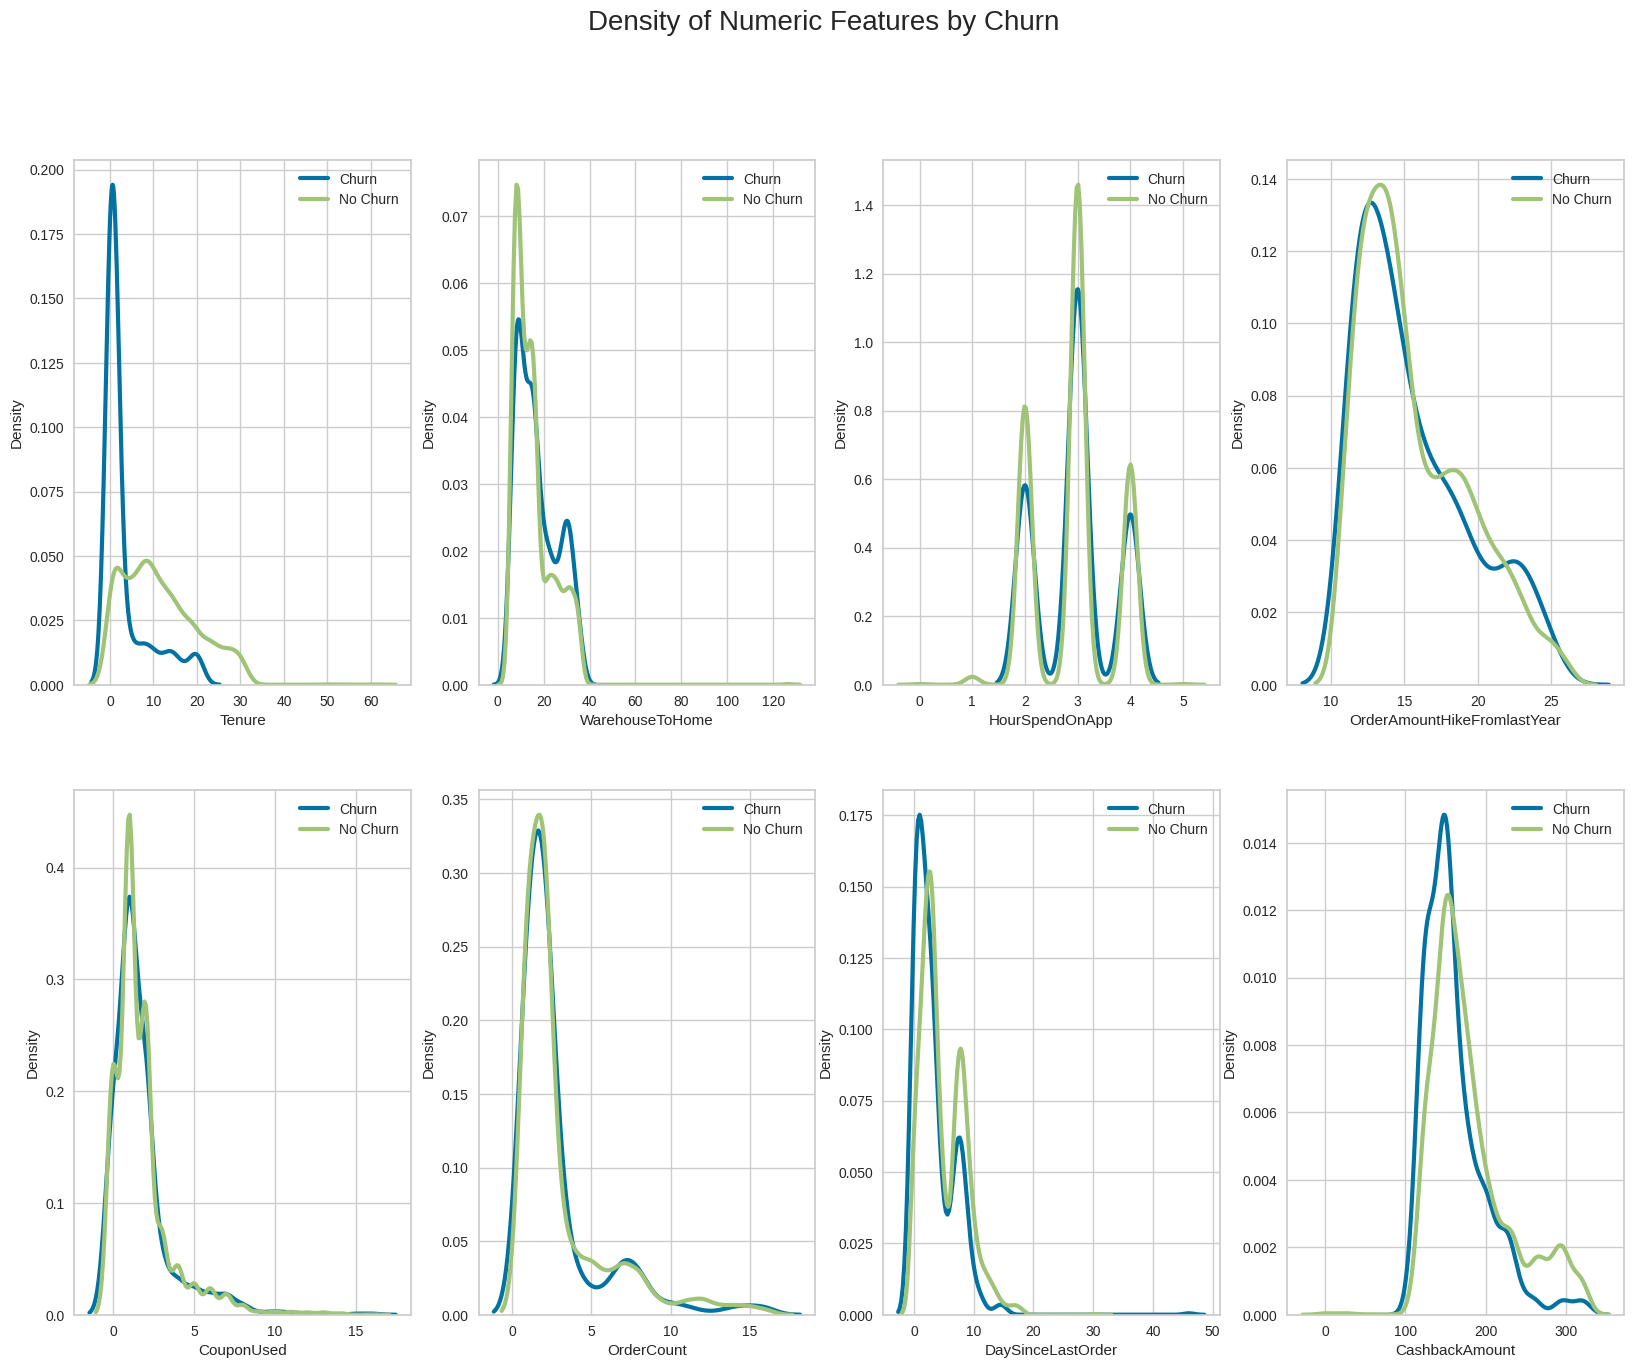

In [ ]:
dataset_churn = dataset[dataset['Churn']==1].copy()
dataset_nochurn = dataset[dataset['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,churn in enumerate(num_cols):
    sns.kdeplot(dataset_churn[churn], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(dataset_nochurn[churn], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

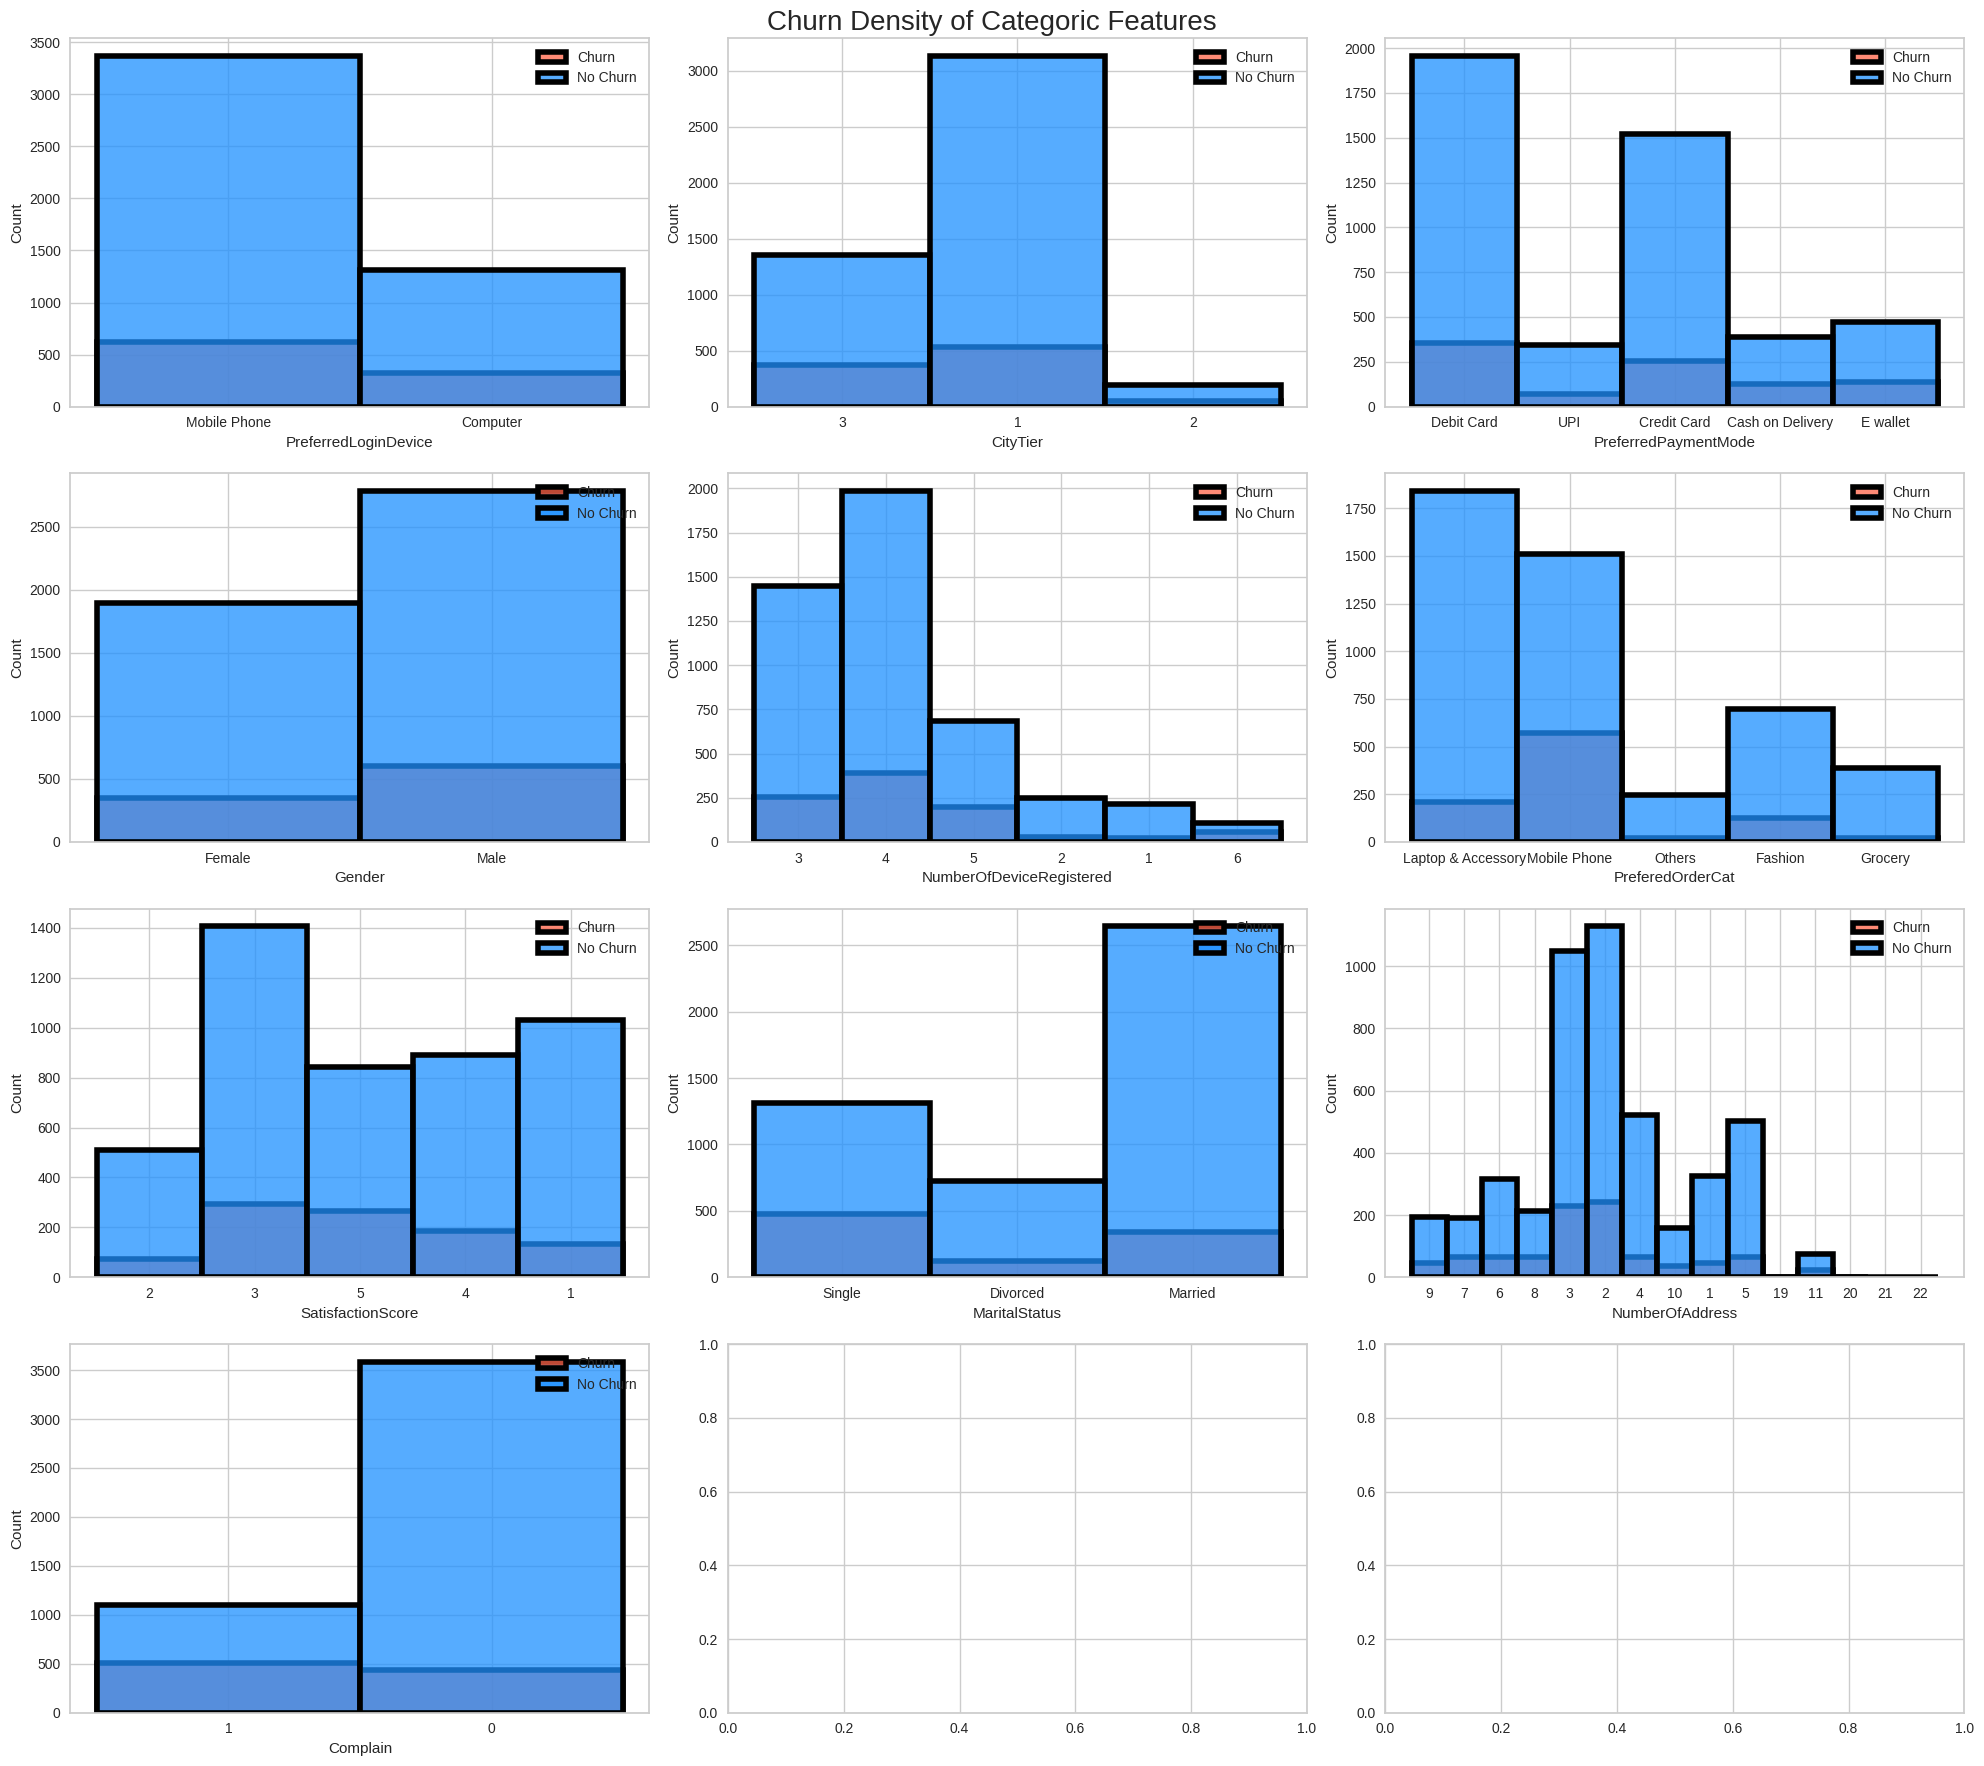

In [ ]:
dataset_churn = df[df['Churn']=='1'].copy()
dataset_nochurn = df[df['Churn']=='0'].copy()

fig, axes = plt.subplots(4, 3, figsize=(20, 18))
fig.suptitle('Churn Density of Categoric Features', fontsize=20)
axes = axes.flatten()

colors = ['#FF6347', '#1E90FF']  # Specify colors for Churn and No Churn

for idx, churn in enumerate(cat_cols):
    sns.histplot(data=dataset_churn, x=churn, linewidth=4, label='Churn', ax=axes[idx], color=colors[0])
    sns.histplot(data=dataset_nochurn, x=churn, linewidth=4, label='No Churn', ax=axes[idx], color=colors[1])
    axes[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()


**1) Is there a relationship between Gender and Churn? & Which Gender has more Orders?**

In [ ]:
# dataset['Gender'].value_counts()

In [ ]:
# # dataset.groupby("Churn")["Gender"].value_counts()
# dataset.groupby(["Churn", "Gender"]).size().unstack(fill_value=0)

In [ ]:
(dataset.groupby("PreferredLoginDevice")["OrderCount"].value_counts())

PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

In [ ]:
!pip3 list | grep -E "matplotlib|pandas"

geopandas                        0.13.2
matplotlib                       3.6.0
matplotlib-inline                0.1.6
matplotlib-venn                  0.11.9
pandas                           1.5.3
pandas-datareader                0.10.0
pandas-gbq                       0.19.2
pandas-stubs                     1.5.3.230304
sklearn-pandas                   2.2.0


In [ ]:
!pip install --upgrade pandas numpy matplotlib
import matplotlib as plt

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 

In [ ]:
# !pip install matplotlib
%matplotlib inline

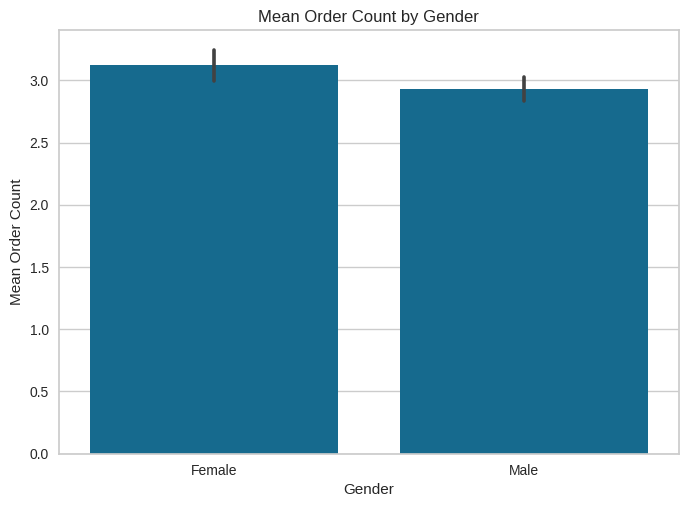

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Gender', y='OrderCount', data=dataset, estimator=np.mean)
plt.xlabel('Gender')
plt.ylabel('Mean Order Count')
plt.title('Mean Order Count by Gender')
plt.show()


**There's no much difference between male and female average order count**

In [ ]:
import sys

In [ ]:
sys.exc_info()

(None, None, None)

In [ ]:
dataset['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [ ]:
dataset.groupby(["Churn", "Gender"]).size().unstack(fill_value=0)

Gender  Female  Male
Churn               
0         1898  2784
1          348   600

In [ ]:
dataset.groupby(["Churn", "CityTier"]).size().unstack(fill_value=0)

CityTier     1    2     3
Churn                    
0         3134  194  1354
1          532   48   368

In [ ]:
percentageMale =600/3384 * 100
print('Percentage of Male churned:', percentageMale)

Percentage of Male churned: 17.73049645390071


In [ ]:
percentageFemale =348/2246 * 100
print('Percentage of Female churn:', percentageFemale)

Percentage of Female churn: 15.49421193232413


In [ ]:
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender',
             title='Churn Rate by Gender',
             labels={'Gender': 'Gender'},
             hover_data=['Churn'],
             color_discrete_sequence=['red', 'yellow'])

# Update layout
fig.update_traces(textinfo='percent+label')
fig.update_layout(legend_title='Gender', title_font_size=20)

# Show plot
fig.show()


**The males are more likely to churn as we have 63.3 % of churned males may be the company should consider incresing the products that attarcts the males customers and provide coupons code on male products.**

**2) Marital Status vs Churn**

In [ ]:
dataset.groupby(["Churn", "MaritalStatus"]).size().unstack(fill_value=0)

MaritalStatus  Divorced  Married  Single
Churn                                   
0                   724     2642    1316
1                   124      344     480

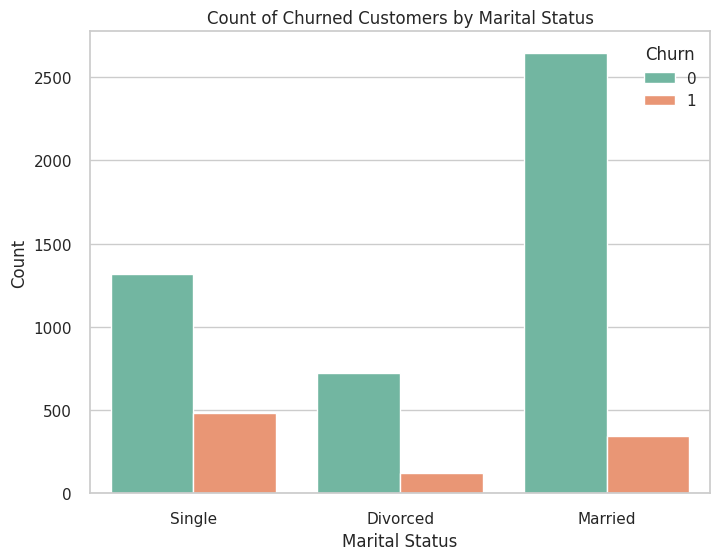

In [ ]:
import matplotlib.pyplot as plt

# Creating the countplot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', hue='Churn', data=dataset, palette='Set2')
plt.title('Count of Churned Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

**The married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single customers as the singles are the most likely to churn.**

**3) Citytier vs Tenure and Order count**

In [ ]:
df_grouped_tenure = dataset.groupby('CityTier')['Tenure'].agg(['mean'])
means = df_grouped_tenure['mean']
means

CityTier
1    10.528818
2    11.169725
3     9.361740
Name: mean, dtype: float64

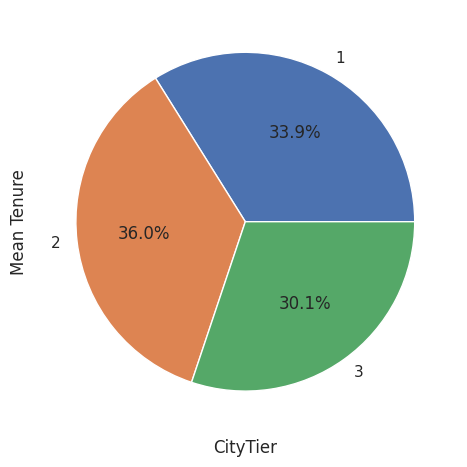

In [ ]:
means.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('CityTier')
plt.ylabel('Mean Tenure')
plt.show()


Citytier 2 has the highest tenure rate but it doesn't seem to be important factor.

In [ ]:
df_grouped_OrderCount = dataset.groupby('CityTier')['OrderCount'].agg(['mean'])
# df_grouped_OrderCount
meansOC = df_grouped_OrderCount['mean']
meansOC

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: mean, dtype: float64

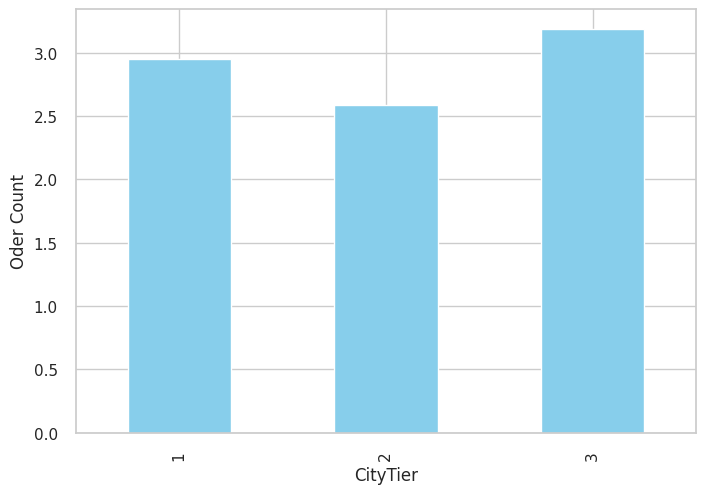

In [ ]:
meansOC.plot(kind='bar', color='skyblue')
plt.xlabel('CityTier')
plt.ylabel('Oder Count')
plt.show()


Citytier 3 has highest order average but it doesn't seem to be important factor.

**4) CityTier vs HourSpendOnApp**

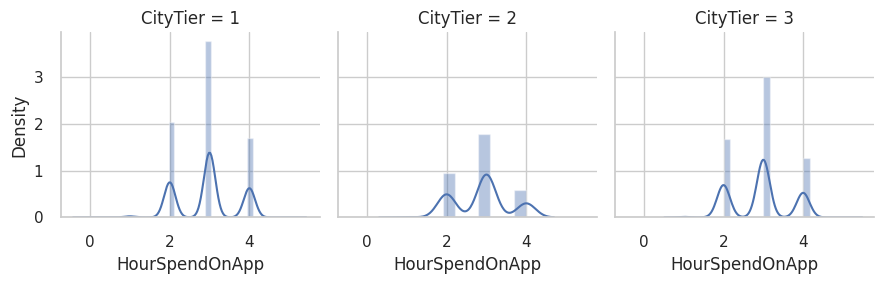

In [ ]:
g = sns.FacetGrid(dataset, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

Citytier 1 has most spended hours on app

**5) Relation between customer's satisfactory score and hours spend on App**

In [ ]:
dataset['SatisfactionScore'].dtypes

dtype('int64')

In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()

As we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app

**6) What is the relation between NumberOfAddress and CityTier within the churn segment?**

In [ ]:
dataset.groupby(["CityTier", "NumberOfAddress"]).size().unstack(fill_value=0)

NumberOfAddress   1    2    3    4    5    6    7    8    9    10  11  19  20  \
CityTier                                                                        
1                228  871  832  397  377  247  173  187  150  129  71   1   1   
2                 23   61   43   16   30   21   10   10    6   13   9   0   0   
3                120  437  403  175  164  114   73   83   83   52  18   0   0   

NumberOfAddress  21  22  
CityTier                 
1                 1   1  
2                 0   0  
3                 0   0

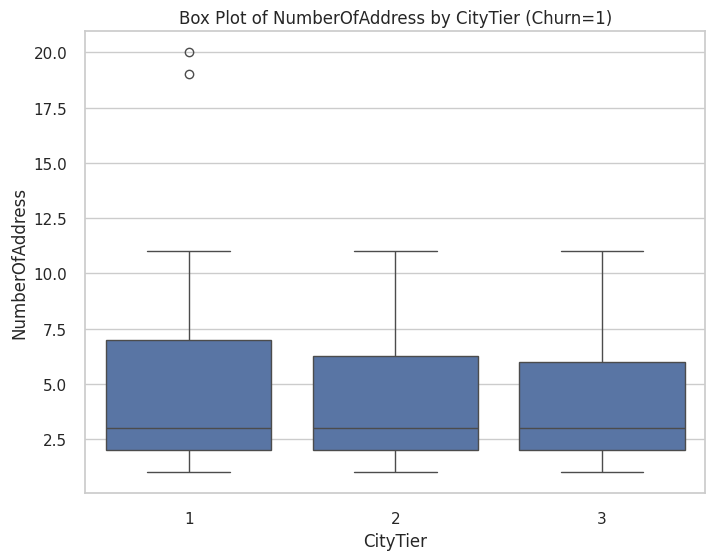

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='CityTier', y='NumberOfAddress', data=dataset[dataset['Churn']==1])
plt.title('Box Plot of NumberOfAddress by CityTier (Churn=1)')
plt.xlabel('CityTier')
plt.ylabel('NumberOfAddress')
plt.show()


The relationship between CityTier and NumberOfAddress is inverse. A more concentrated distribution and a lower average number of addresses are linked to higher city tiers. In comparison to smaller cities and towns in lower tiers, customers in major cities (CityTier 1) typically have more addresses. The relation implies that the number of addresses clients have across city types is influenced by address density and location type (metro, smaller cities, towns).

**7) What is the relation between Complain and DaySinceLastOrder?**

In [ ]:
# Pearson correlation
dataset[['DaySinceLastOrder', 'Complain']].corr()

DaySinceLastOrder  Complain
DaySinceLastOrder           1.000000 -0.043546
Complain                   -0.043546  1.000000

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

There is a weak negative relation between complainig and the number of dayes since last order

**8) Is there a relationship between PreferredLoginDevice and churn?**

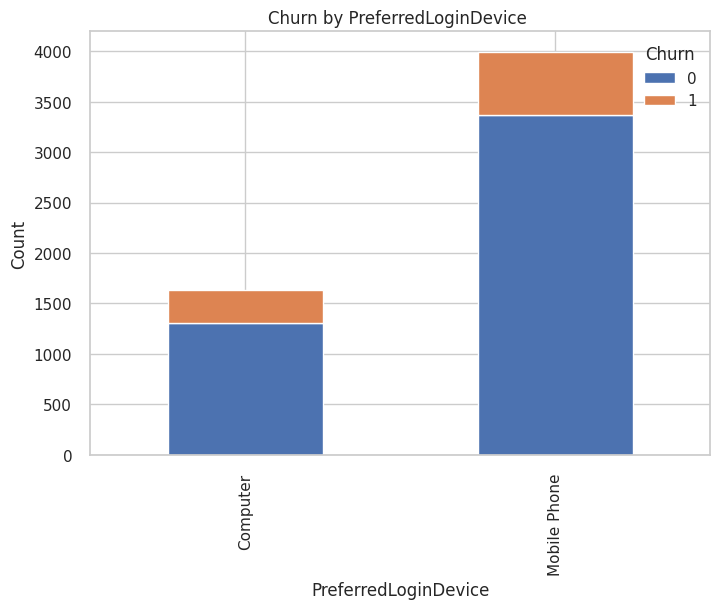

In [ ]:
import seaborn as sns
grouped_data = dataset.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()


Mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version

**9) What is distancebetween warehosue to customer house in different city tier ?**

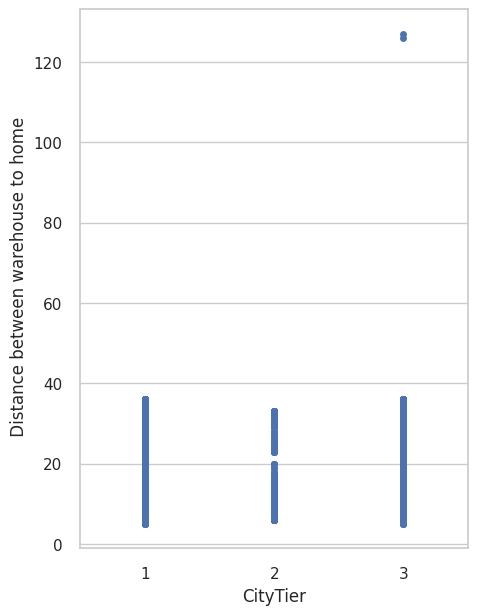

In [ ]:
df2 = dataset.copy()

df2['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df2, jitter = False)
plt.ylabel(' Distance between warehouse to home');

Inference: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also

**10) Does different citytiers has different prefered products?**

In [ ]:
import plotly.express as px

fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

Laptop & accesories and mobile phones are the prefered category for all the city tiers

**11) What is the preferred payment mode for different CityTiers?**

In [ ]:
df2['PreferredPaymentMode'].value_counts()


Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
# df.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

In [ ]:
dataset.groupby(["CityTier", "PreferredPaymentMode"]).size().unstack(fill_value=0)

PreferredPaymentMode  Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
CityTier                                                                      
1                                  366         1382        1676         0  242
2                                   16           50          62         0  114
3                                  132          342         576       614   58

In [ ]:
import plotly.express as px

fig=px.histogram(df,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

#### preferred payment method for CityTier '1' ==> DebitCard
#### preferred payment method for CityTier '2' ==> UPI
#### preferred payment method for CityTier '3' ==> E wallet

**12) Which CityTier has the highest OrderCount?**

In [ ]:
df.groupby('CityTier')[['OrderCount']].sum()

OrderCount
CityTier            
1            10298.0
2              615.0
3             5246.0

In [ ]:
fig = px.histogram(df, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

CityTier '1' has highest order count with 10298 orders

**13) Does the percentage increase in order amount from last year affect churn rate?**

In [ ]:
df['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [ ]:
dataset.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().unstack(fill_value=0)

Churn                          0    1
OrderAmountHikeFromlastYear          
11.0                         309   82
12.0                         584  144
13.0                         613  128
14.0                         634  116
15.0                         460   82
16.0                         269   64
17.0                         243   54
18.0                         267   54
19.0                         267   44
20.0                         211   32
21.0                         166   24
22.0                         150   34
23.0                         108   36
24.0                          60   24
25.0                          59   14
26.0                          31    2

In [ ]:
comp_ten = df.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

Graph Show when the percentage of order last year increase the churn rate decrease so OrderAmountHikeFromlastYear has postive effect on Churn rate and we need to focus when customer has percentage 12% - 15%

**14) What is the relation between Complain and DaySinceLastOrder for churned customers?**

In [ ]:
dataset_churn.groupby('Complain')[['DaySinceLastOrder']].sum()

DaySinceLastOrder
Complain                   
0                    1313.0
1                    1580.0

In [ ]:
fig = px.histogram(df, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain",
                   marginal="violin")

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

Customers who didn't made complain has higher DaySinceLastOrder , however it's only one customer so its an outlier if we remove it we will customers with no complain has lower DaySinceLastOrder

**15) What is the order counts for customers with high HourSpendOnApp?**

In [ ]:
# we will make binnig for column HourSpendOnApp
df['HourSpendOnApp'].agg(['min','max'])

min    0.0
max    5.0
Name: HourSpendOnApp, dtype: float64

In [ ]:
# Define the bin range
bins = [0 , 1 , 3 , 6]
label = ['low' , 'medium' , 'high']
# Create a new column 'HourSpendOnApp_bins' with the binned values
df['HourSpendOnApp_bins'] = pd.cut(df['HourSpendOnApp'], bins=bins , labels = label)

In [ ]:
df.groupby(['HourSpendOnApp_bins','OrderCount'])[['CustomerID']].count()

CustomerID
HourSpendOnApp_bins OrderCount            
low                 1.0                 16
                    2.0                  7
                    3.0                  1
                    4.0                  3
                    5.0                  0
                    6.0                  0
                    7.0                  4
                    8.0                  0
                    9.0                  0
                    10.0                 0
                    11.0                 1
                    12.0                 1
                    13.0                 0
                    14.0                 0
                    15.0                 0
                    16.0                 0
medium              1.0               1553
                    2.0               1242
                    3.0                267
                    4.0                160
                    5.0                130
                    6.0                105
                    7.0                169
                    8.0                 99
                    9.0                 53
                    10.0                21
                    11.0                46
                    12.0                36
                    13.0                24
                    14.0                34
                    15.0                21
                    16.0                13
high                1.0                  1
                    2.0                738
                    3.0                 96
                    4.0                 34
                    5.0                 45
                    6.0                 30
                    7.0                 25
                    8.0                 69
                    9.0                  9
                    10.0                15
                    11.0                 4
                    12.0                15
                    13.0                 6
                    14.0                 2
                    15.0                10
                    16.0                10

In [ ]:
sunbrust_gr = df.loc[:,['HourSpendOnApp_bins','OrderCount']].dropna()

In [ ]:
import plotly.express as px

# Create a sunburst chart using Plotly Express
fig = px.sunburst(sunbrust_gr, path=['HourSpendOnApp_bins', 'OrderCount'],
                  title="<b>HourSpendOnApp VS OrderCount", template="plotly",
color_discrete_sequence=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666'])

# Update layout and customization
fig.update_layout(hovermode='x', title_font_size=30)
fig.update_layout(
    title_font_color="black",
    template="plotly",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()

Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%

**16) Is there a relationship between preferred order category and churn rate?**

In [ ]:
df.groupby(['PreferedOrderCat' , 'Gender'])[['CustomerID']].count()

CustomerID
PreferedOrderCat   Gender            
Fashion            Female         354
                   Male           472
Grocery            Female         198
                   Male           212
Laptop & Accessory Female         844
                   Male          1206
Mobile Phone       Female         764
                   Male          1316
Others             Female          86
                   Male           178

In [ ]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df2.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()

fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'Count',color='Gender', barmode='group',color_discrete_sequence=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
,title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

####Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
####Top 2 Preferd Category For Females == > [ Grocery , Fashion ]

**17) Do customers who used more coupons have lower churn rates?**

In [ ]:
df.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1727
           1             378
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()

fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
 ,title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()


Grpah shows Churn become less when more coupons used

**18) Is there a connection between satisfaction score and number of orders in the past month?**

In [ ]:
dataset.groupby(["SatisfactionScore", "OrderCount"]).size().unstack(fill_value=0)

OrderCount         1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
SatisfactionScore                                                               
1                   350   419    93    50    43    29    41    35    16     6   
2                   181   215    38    21    19    10    20    18     7     4   
3                   533   618   114    59    59    39    49    44    21    16   
4                   328   383    71    44    34    24    44    40     6     4   
5                   359   390    55    30    26    35    52    35    12     6   

OrderCount         11.0  12.0  13.0  14.0  15.0  16.0  
SatisfactionScore                                      
1                    10     9     7     7     3     2  
2                     7     7     4     2     3     2  
3                    16    17     6     9     9     9  
4                    10    10     6     6     6     4  
5                     8    11     7    12    12     6

In [ ]:
fig = px.box(df, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore",color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                         '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                         '#8c6d31', '#bebada', '#fb8072', '#80b1d3']
, title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

StatisfactionScore doesn't have affect on OrderCount

**19) There is relation between CashbackAmount and order counts within churn?**

In [ ]:
dataset_churn.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()

Churn
OrderCount CashbackAmount       
1.0        110.09              2
           110.81              2
           110.91              2
           111.02              2
           111.18              2
...                          ...
15.0       203.12              2
           295.45              2
16.0       152.43              2
           228.12              2
           320.45              2

[461 rows x 1 columns]

In [ ]:
fig = px.histogram(df, x='CashbackAmount', y='OrderCount' ,color = 'Churn',color_discrete_sequence=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']
, title="<b>"+'CashbackAmount Vs OrderCount within churn')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

Graphs shows there is no relation between cash back amount and ordercount and there is postive relation between cashback amount and churn rate

**20) Are customers who complained more likely to churn?**

In [ ]:
dataset.groupby(["Complain", "Churn"]).size().unstack(fill_value=0)

Churn        0    1
Complain           
0         3586  440
1         1096  508

In [ ]:
comp_churn = pd.DataFrame(df2.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='Count' , color_discrete_sequence=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']
,title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508
   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508


From the grapg we can infer that around 68% of the people who had complained has not churned and 32% have been churned this shows that complains have some affect on churn.

# **DATA PROCESSING**

Handling missing values

In [ ]:
round((dataset.isnull().sum()*100/dataset.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

<AxesSubplot: >

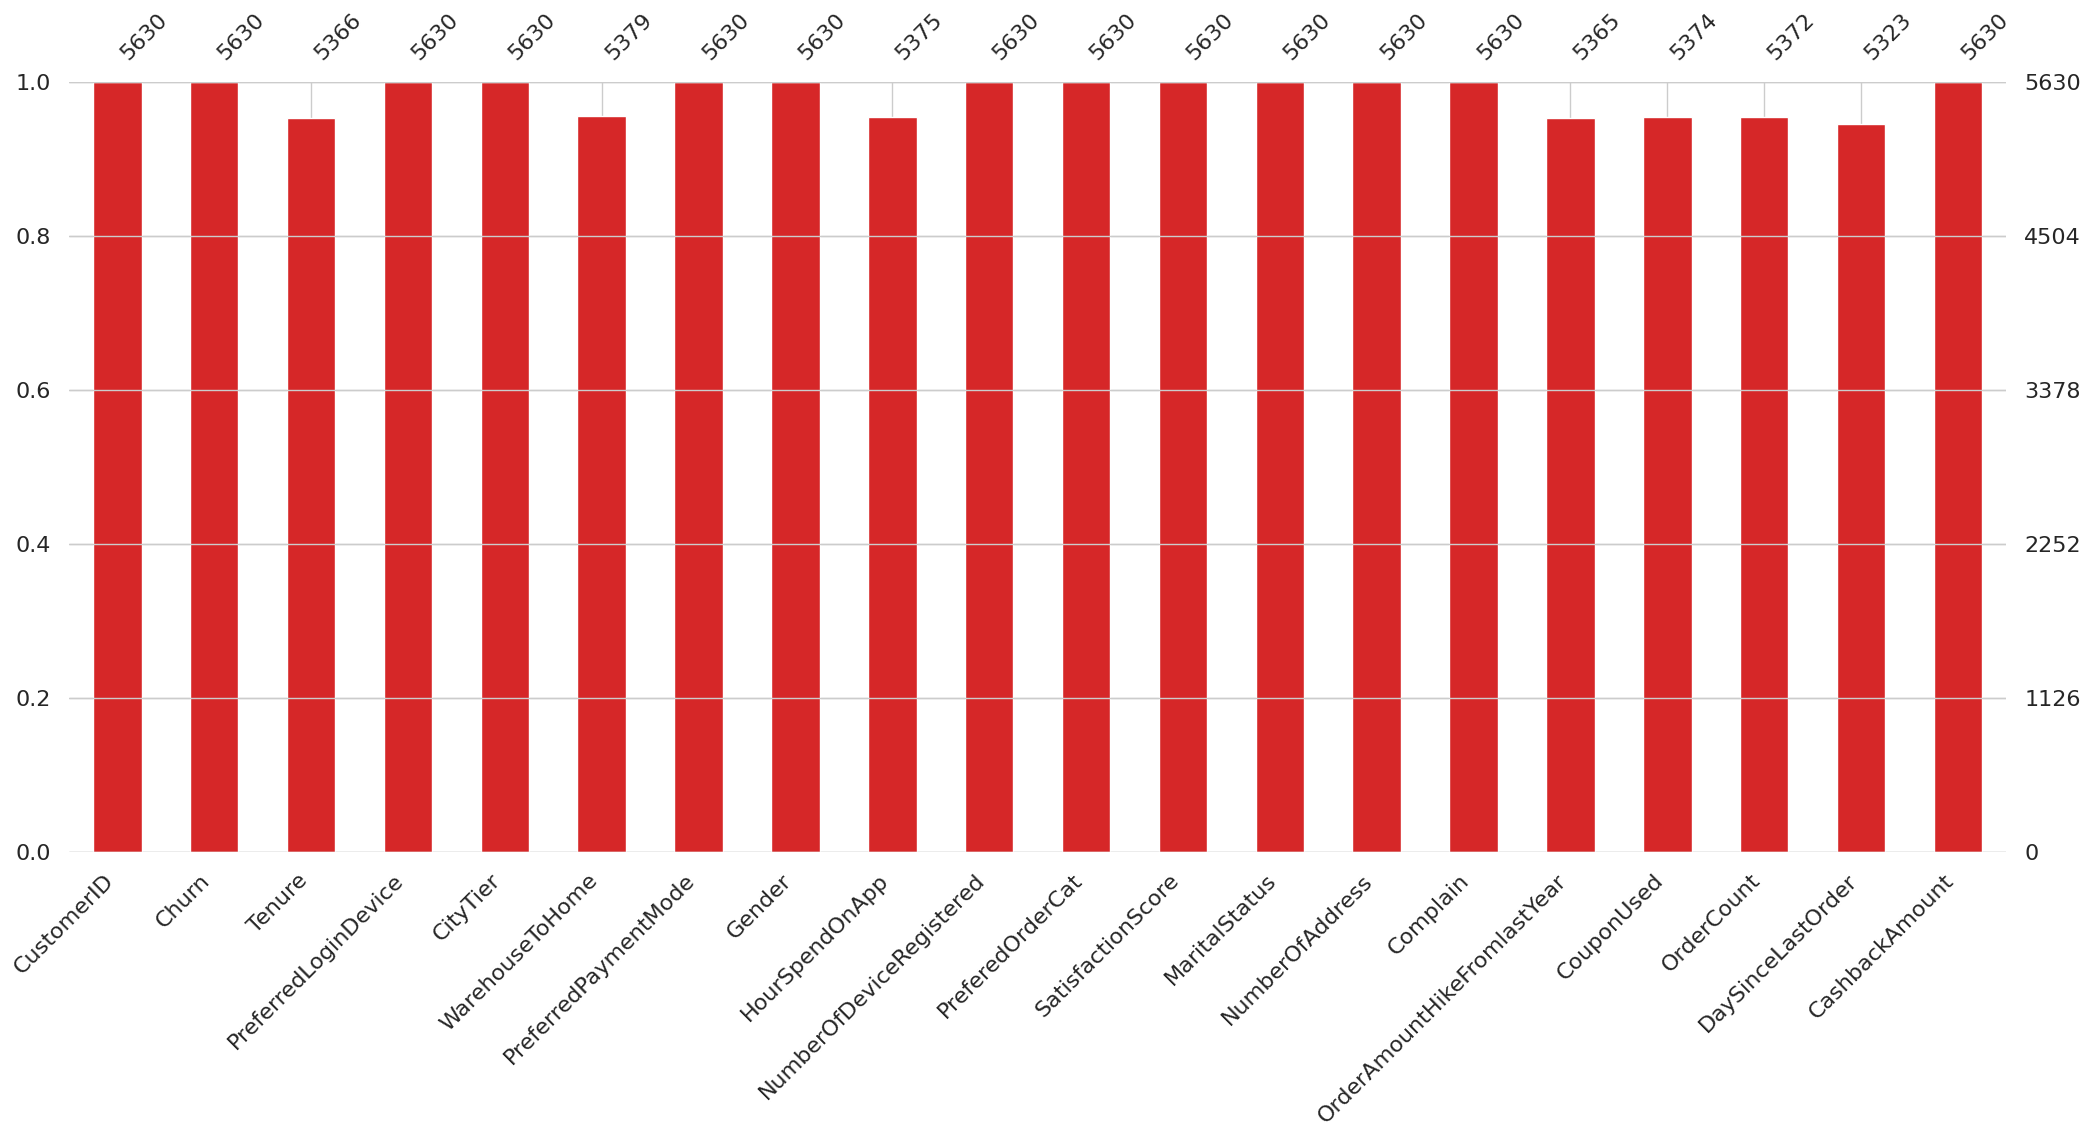

In [ ]:
msno.bar(dataset, color="tab:red")

Since the missing value percentage is less than 6% we can impute them. And here we have decided to go with Simple imputer and KNN imputation.

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

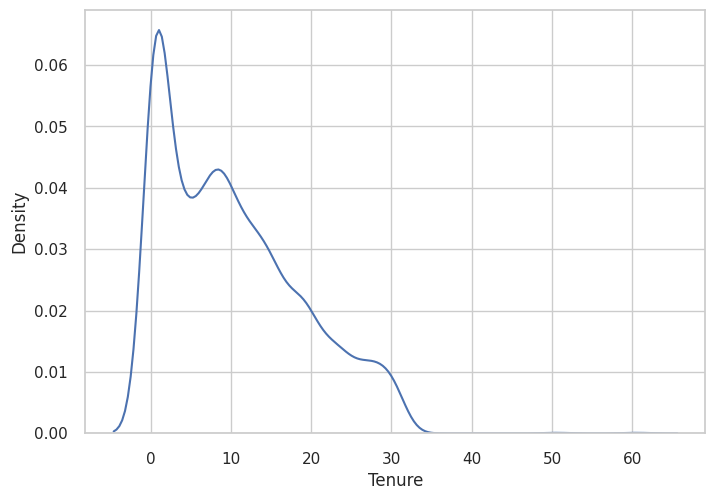

In [ ]:
sns.kdeplot(dataset , x='Tenure')

In [ ]:
# impute with bfill Method
dataset['Tenure'] = dataset['Tenure'].fillna(method = 'bfill')

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

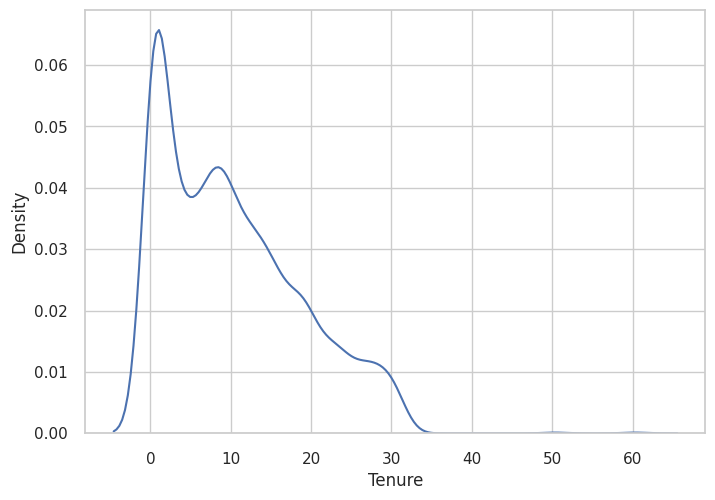

In [ ]:
sns.kdeplot(dataset , x='Tenure')

In [ ]:
dataset['Tenure'].isnull().sum()

0

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

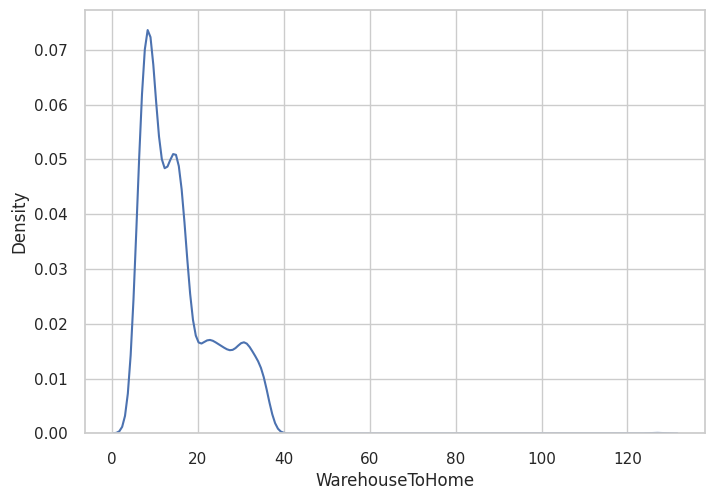

In [ ]:
sns.kdeplot(dataset , x='WarehouseToHome')

In [ ]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
dataset['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(dataset['WarehouseToHome']))

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

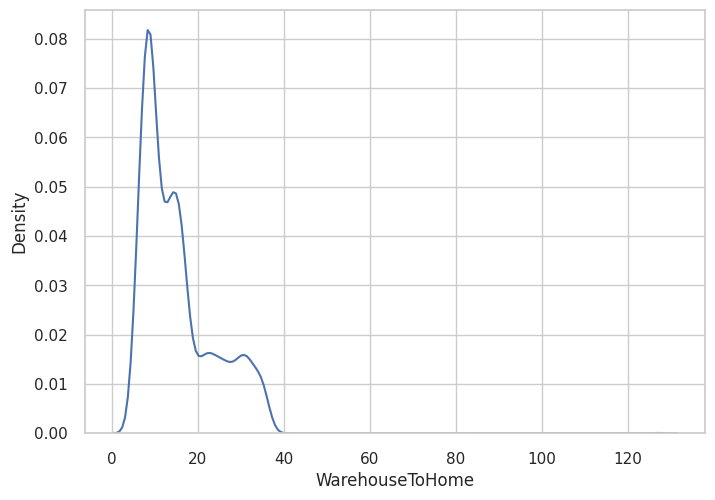

In [ ]:
sns.kdeplot(dataset , x='WarehouseToHome')

In [ ]:
dataset['WarehouseToHome'].isnull().sum()

0

<AxesSubplot: xlabel='HourSpendOnApp', ylabel='Density'>

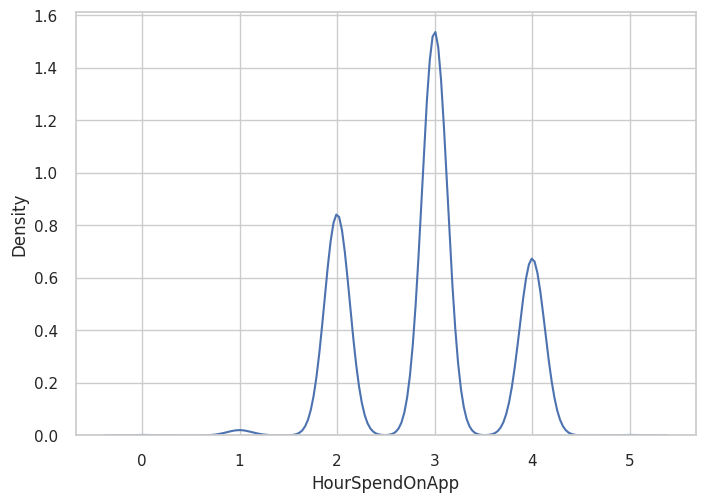

In [ ]:
sns.kdeplot(dataset , x='HourSpendOnApp')

In [ ]:
fill_list = dataset['HourSpendOnApp'].dropna()
dataset['HourSpendOnApp'] = dataset['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(dataset['HourSpendOnApp'].index))))

<AxesSubplot: xlabel='HourSpendOnApp', ylabel='Density'>

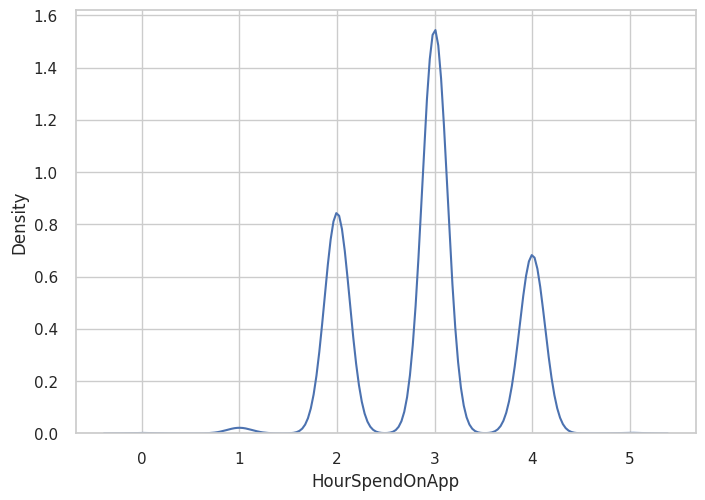

In [ ]:
sns.kdeplot(dataset , x='HourSpendOnApp')

In [ ]:
dataset['HourSpendOnApp'].isnull().sum()

0

<AxesSubplot: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

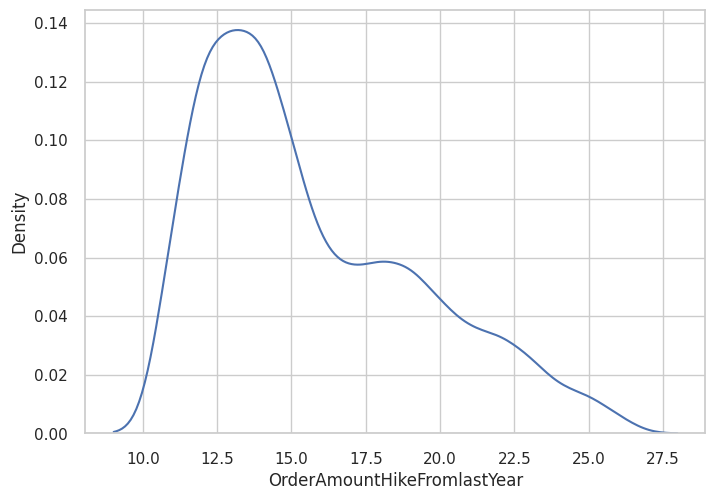

In [ ]:
sns.kdeplot(dataset , x='OrderAmountHikeFromlastYear')

In [ ]:
# impute with ffill method
dataset['OrderAmountHikeFromlastYear'] = dataset['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

<AxesSubplot: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

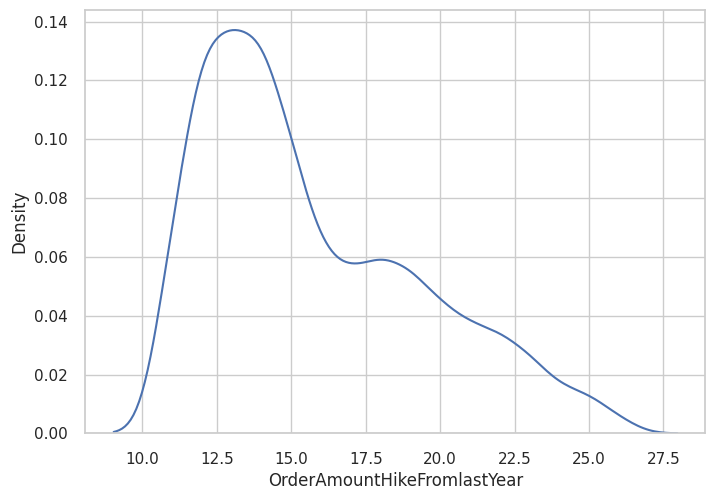

In [ ]:
sns.kdeplot(dataset , x='OrderAmountHikeFromlastYear')

In [ ]:
dataset['OrderAmountHikeFromlastYear'].isnull().sum()

0

<AxesSubplot: xlabel='CouponUsed', ylabel='Density'>

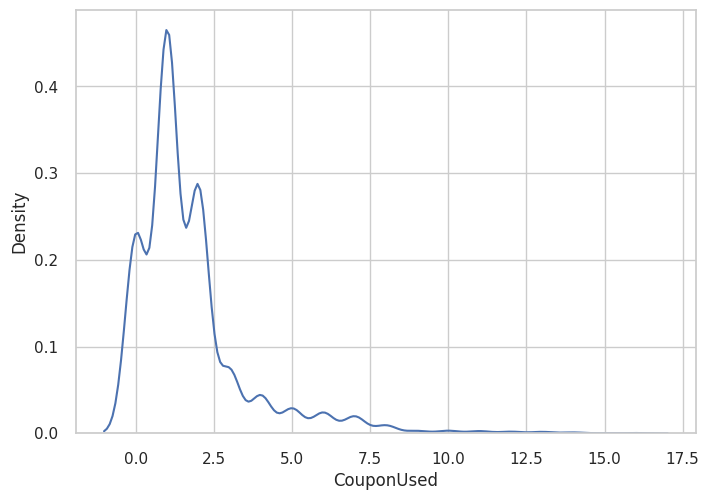

In [ ]:
sns.kdeplot(dataset , x='CouponUsed')

In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
dataset['CouponUsed']=imputer.fit_transform(dataset[['CouponUsed']])

<AxesSubplot: xlabel='CouponUsed', ylabel='Density'>

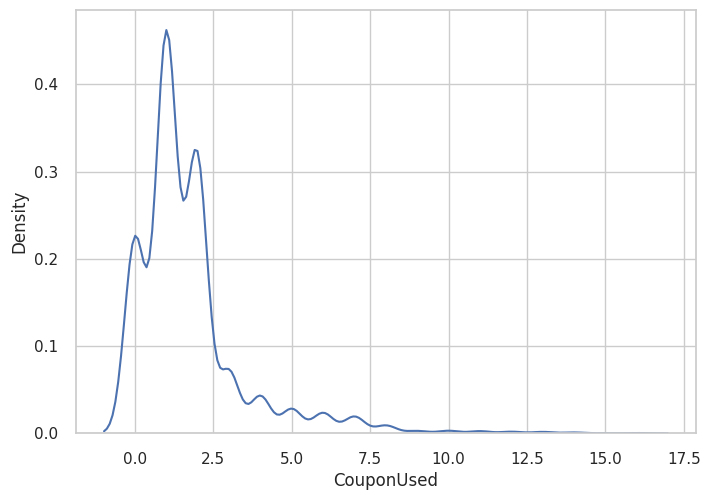

In [ ]:
sns.kdeplot(dataset , x='CouponUsed')

In [ ]:
dataset['CouponUsed'].isnull().sum()

0

<AxesSubplot: xlabel='OrderCount', ylabel='Density'>

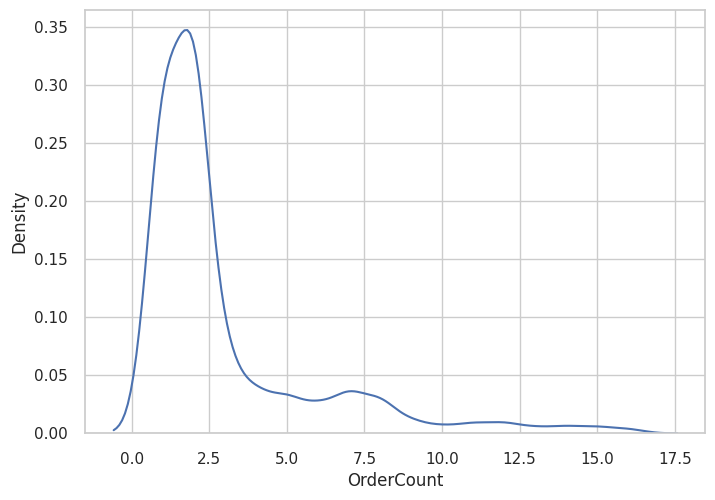

In [ ]:
sns.kdeplot(dataset , x='OrderCount')

In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
dataset['OrderCount']=imputer.fit_transform(dataset[['OrderCount']])

<AxesSubplot: xlabel='OrderCount', ylabel='Density'>

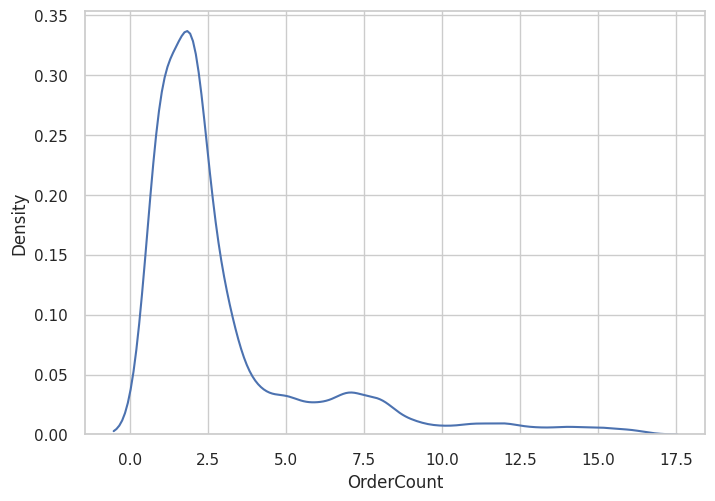

In [ ]:
sns.kdeplot(dataset , x='OrderCount')

In [ ]:
dataset['OrderCount'].isnull().sum()

0

<AxesSubplot: xlabel='DaySinceLastOrder', ylabel='Density'>

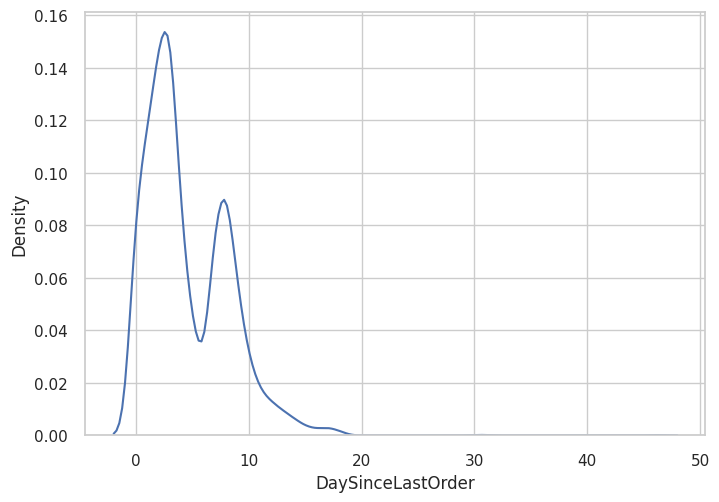

In [ ]:
sns.kdeplot(dataset , x='DaySinceLastOrder')

In [ ]:
# impute with bfill Method
dataset['DaySinceLastOrder'] = dataset['DaySinceLastOrder'].fillna(method = 'bfill')

<AxesSubplot: xlabel='DaySinceLastOrder', ylabel='Density'>

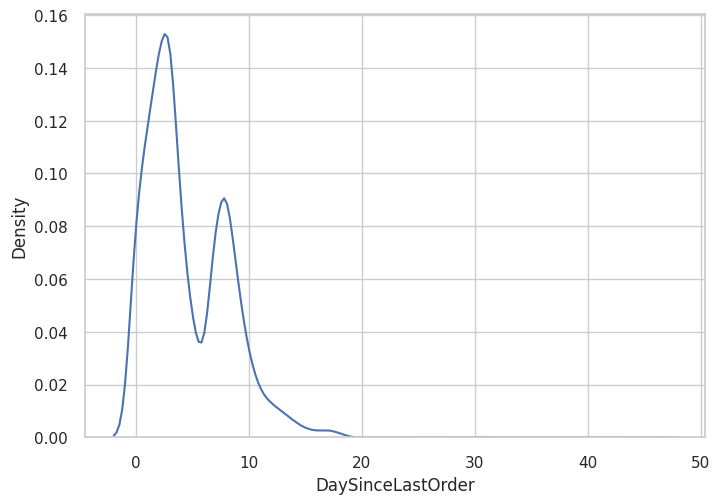

In [ ]:
sns.kdeplot(dataset , x='DaySinceLastOrder')

In [ ]:
dataset['DaySinceLastOrder'].isnull().sum()

0

In [ ]:
dataset.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

All the missing values have been handled.

In [ ]:
dataset.shape

(5630, 20)

In [ ]:
# droping the CustoemrID
dataset.drop('CustomerID', axis=1, inplace=True)

In [ ]:
dataset.shape

(5630, 19)

In [ ]:
[print(dataset[i].value_counts(), '\n' + '*' * 40) for i in dataset.columns if dataset[i].dtype == 'object']

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64 
****************************************
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64 
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64 
****************************************
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 
****************************************


[None, None, None, None, None]

In [ ]:
data = dataset[dataset.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in dataset.columns:
  if dataset[i].dtype == 'object':
    dataset[i] = le.fit_transform(dataset[i])

dataset.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

In [ ]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     2       0                 2   
1                     1                     4       1                 3   
2                     1                     2       1                 3   
3                     1                     2       1                 2   

   MaritalStatus  
0              2  
1              2  
2              2  
3              2

**Handling Outliers**

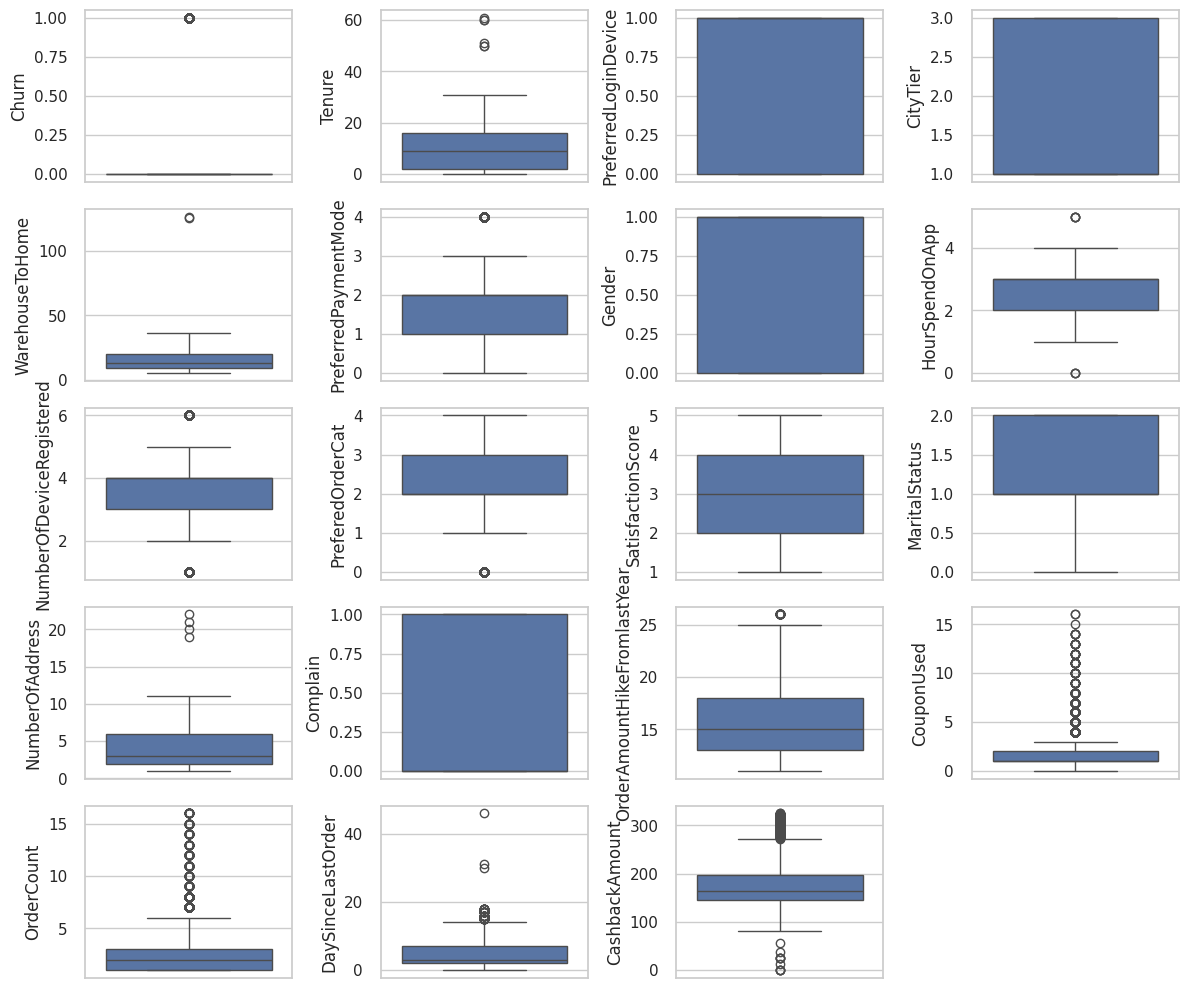

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(dataset.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=dataset.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# lets detect True Outliers
def handle_outliers(dataset , column_name):
  Q1 = dataset[column_name].quantile(0.25)
  Q3 = dataset[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_dataset = dataset[ (dataset[column_name] > lower) & (dataset[column_name] < Upper) ]

  return new_dataset

In [ ]:
dataset.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    dataset = handle_outliers(dataset , col)

dataset.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

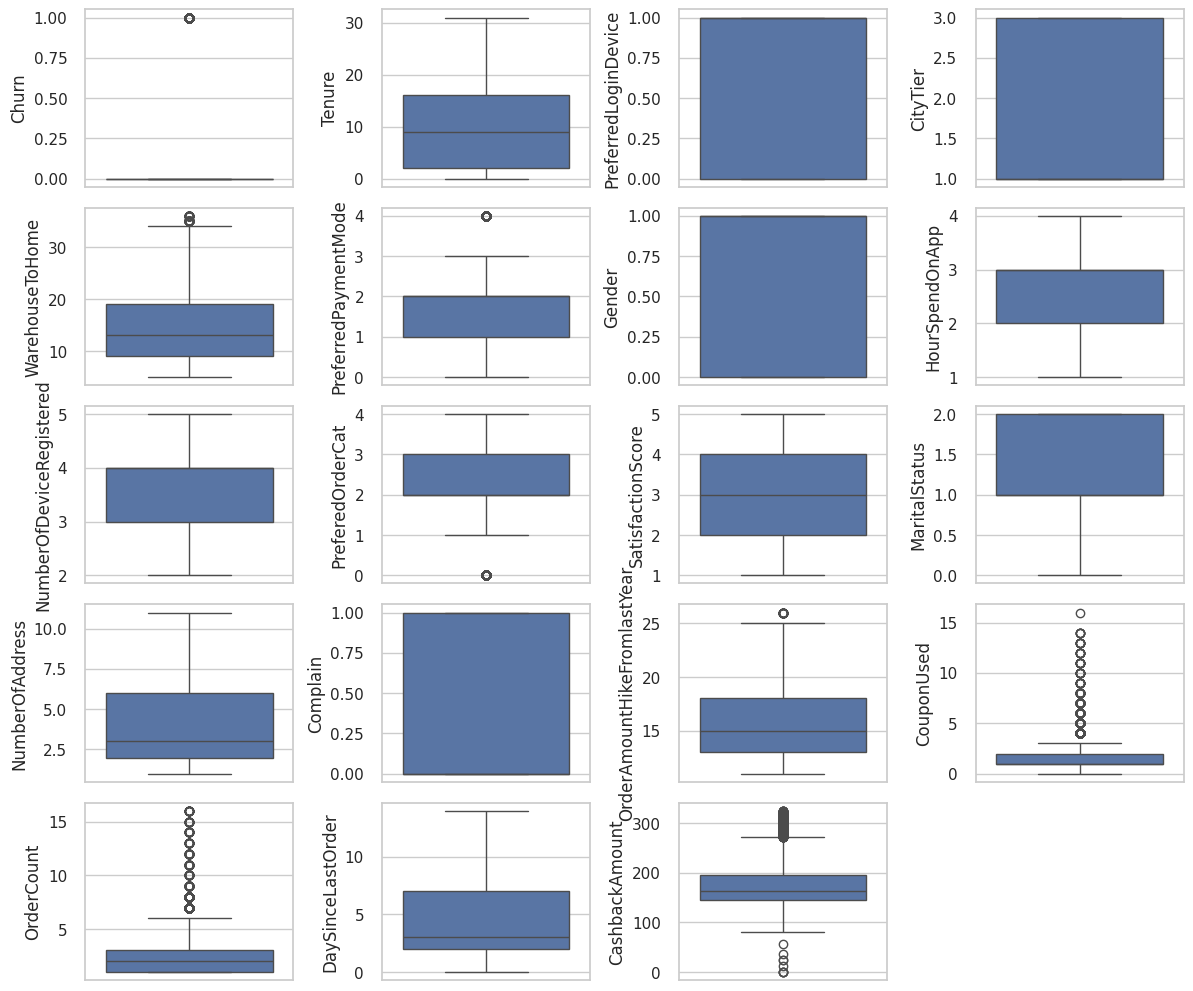

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(dataset.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=dataset.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = dataset.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.336058             -0.041250   
Tenure                      -0.336058  1.000000              0.034596   
PreferredLoginDevice        -0.041250  0.034596              1.000000   
CityTier                     0.069595 -0.065933              0.010097   
WarehouseToHome              0.054768 -0.011849             -0.015852   
PreferredPaymentMode        -0.005156 -0.016797              0.009610   
Gender                       0.038193 -0.054684             -0.012892   
HourSpendOnApp               0.001487 -0.010876              0.020462   
NumberOfDeviceRegistered     0.079116 -0.019592             -0.005323   
PreferedOrderCat             0.105149 -0.180637              0.005137   
SatisfactionScore            0.108600 -0.013331              0.037642   
MaritalStatus                0.131982 -0.111074             -0.020207   
NumberOfAddress              0.033703  0.240939              0.033310   
Complain                     0.252346 -0.023903              0.005983   
OrderAmountHikeFromlastYear -0.002545  0.017177             -0.005296   
CouponUsed                  -0.017914  0.127314             -0.015940   
OrderCount                  -0.036568  0.181138             -0.021975   
DaySinceLastOrder           -0.164448  0.164444             -0.027906   
CashbackAmount              -0.165008  0.453981              0.042321   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069595         0.054768             -0.005156   
Tenure                      -0.065933        -0.011849             -0.016797   
PreferredLoginDevice         0.010097        -0.015852              0.009610   
CityTier                     1.000000         0.014636              0.251539   
WarehouseToHome              0.014636         1.000000              0.008046   
PreferredPaymentMode         0.251539         0.008046              1.000000   
Gender                      -0.022759        -0.015904              0.020086   
HourSpendOnApp              -0.014625         0.081640             -0.011101   
NumberOfDeviceRegistered     0.007282         0.029049              0.012908   
PreferedOrderCat            -0.164040        -0.114357             -0.030738   
SatisfactionScore           -0.009735         0.013783             -0.018085   
MaritalStatus                0.002254        -0.028226             -0.024158   
NumberOfAddress             -0.033363         0.001173              0.003223   
Complain                     0.006312         0.022052              0.028288   
OrderAmountHikeFromlastYear -0.022135         0.028927             -0.000268   
CouponUsed                   0.017139         0.013175             -0.008582   
OrderCount                   0.035656         0.016235             -0.039249   
DaySinceLastOrder            0.023394         0.044883             -0.003581   
CashbackAmount               0.044946         0.036318              0.034381   

                               Gender  HourSpendOnApp  \
Churn                        0.038193        0.001487   
Tenure                      -0.054684       -0.010876   
PreferredLoginDevice        -0.012892        0.020462   
CityTier                    -0.022759       -0.014625   
WarehouseToHome             -0.015904        0.081640   
PreferredPaymentMode         0.020086       -0.011101   
Gender                       1.000000       -0.020869   
HourSpendOnApp              -0.020869        1.000000   
NumberOfDeviceRegistered    -0.020954        0.266189   
PreferedOrderCat             0.060969        0.029637   
SatisfactionScore           -0.037348        0.028323   
MaritalStatus               -0.019975       -0.048666   
NumberOfAddress             -0.030577        0.139410   
Complain                    -0.030350        0.001110   
OrderAmountHikeFromlastYear -0.007694        0.104273   
CouponUsed                  -0.026477        0.178390   
O

<AxesSubplot: >

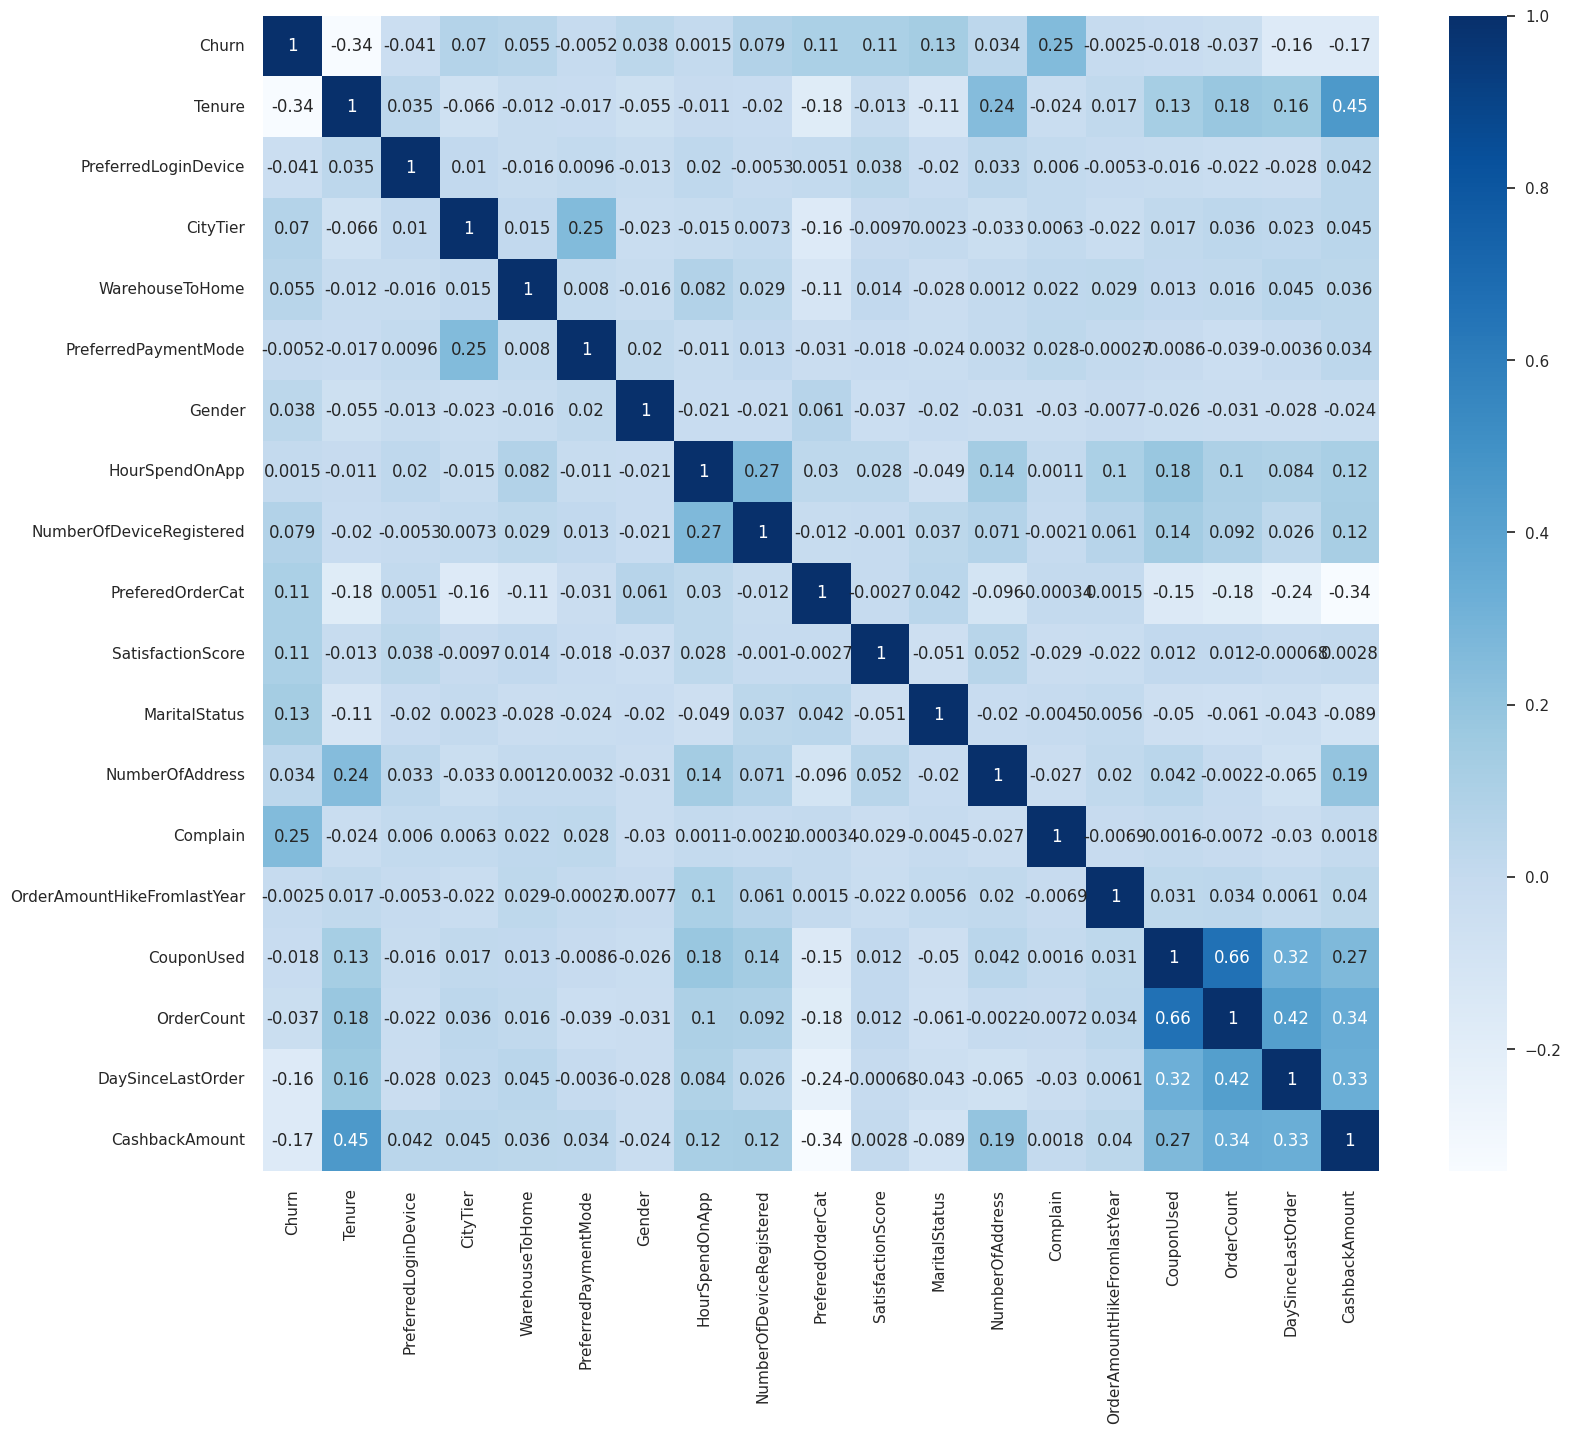

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(dataset.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252346
MaritalStatus                  0.131982
SatisfactionScore              0.108600
PreferedOrderCat               0.105149
NumberOfDeviceRegistered       0.079116
CityTier                       0.069595
WarehouseToHome                0.054768
Gender                         0.038193
NumberOfAddress                0.033703
HourSpendOnApp                 0.001487
OrderAmountHikeFromlastYear   -0.002545
PreferredPaymentMode          -0.005156
CouponUsed                    -0.017914
OrderCount                    -0.036568
PreferredLoginDevice          -0.041250
DaySinceLastOrder             -0.164448
CashbackAmount                -0.165008
Tenure                        -0.336058
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and churn')

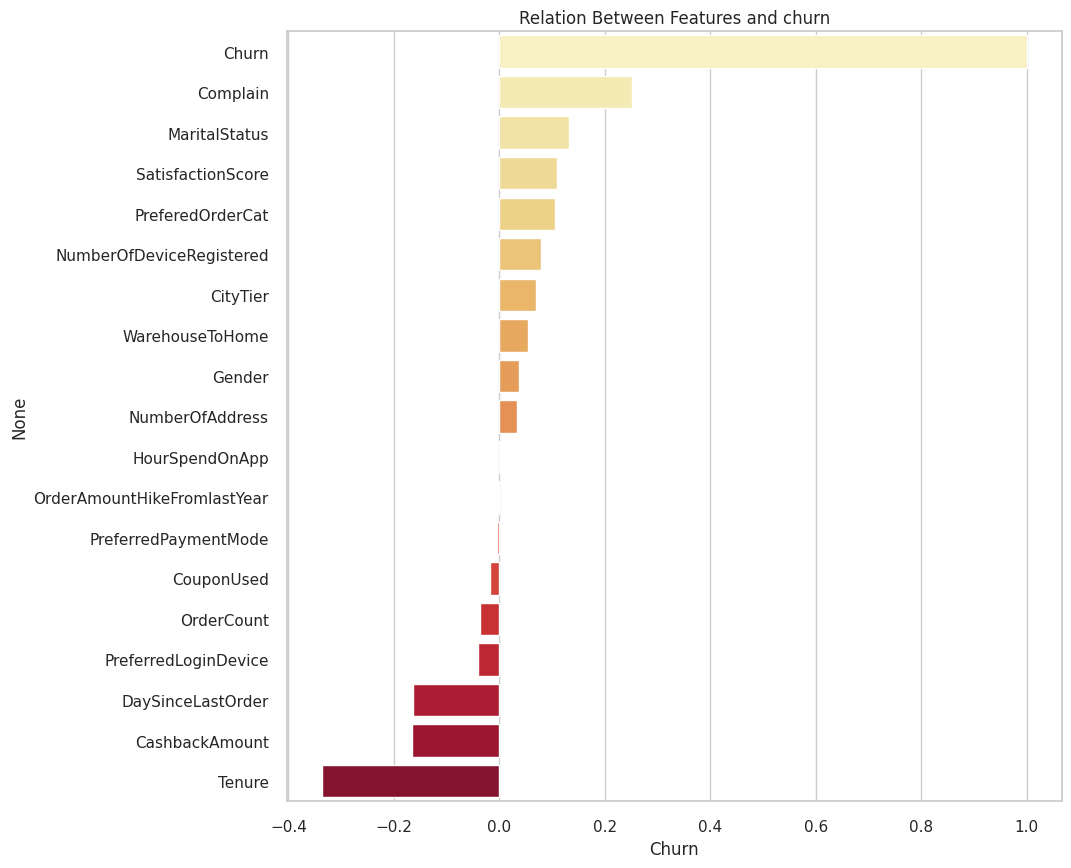

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'YlOrRd')
plt.title('Relation Between Features and churn')

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Churn",
                   title='Check Imbalance',
                   color_discrete_sequence=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666'])

fig.update_layout(
    xaxis_title='Churn',
    yaxis_title='Count',
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    hoverlabel_font_size=20,
    title_x=0.5,
    template="plotly"
)

fig.show()


**Handling imbalanced data**

In [ ]:
X = dataset.drop('Churn' , axis = 1)
Y = dataset['Churn']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a3aa9aca0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


In [ ]:
x_over.shape, y_over.shape

((8582, 18), (8582,))

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame with oversampled data
df_over = pd.concat([pd.DataFrame(x_over, columns=X.columns), pd.DataFrame({'Churn': y_over})], axis=1)

# Plot after SMOTETomek
fig_after = px.histogram(df_over, x="Churn", color="Churn",
                          title='After SMOTETomek',
                          color_discrete_sequence=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666'])


fig_after.update_layout(
    xaxis_title='Churn',
    yaxis_title='Count',
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    hoverlabel_font_size=20,
    title_x=0.5,
    template="plotly"
)


# Show both plots side by side
fig_after.show()

**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

**Models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings("ignore")

In [ ]:
dt_clf = DecisionTreeClassifier()
logisreg_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
svm_clf = SVC()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()
ann_clf = MLPClassifier()

In [ ]:
clf_list = [dt_clf, logisreg_clf, knn_clf, rf_clf, svm_clf, XGB_clf, ada_clf, ann_clf]
clf_name_list = ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbors', 'Random Forest', 'Support Vector Machine', 'XGBClassifier' , 'AdaBoostClassifier', 'MLPClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.neural_network import MLPClassifier

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 40)
    print('*' * 40)
    print(' ' * 40)


Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9359223300970874
Acc Train: 1.0
Acc Test: 0.9359223300970874
                                        
****************************************
                                        
Using model: Logistic Regression
Trainning Score: 0.7684368237056767
Test Score: 0.7732038834951457
Acc Train: 0.7684368237056767
Acc Test: 0.7732038834951457
                                        
****************************************
                                        
Using model: K Nearest Neighbors
Trainning Score: 0.9488929582154153
Test Score: 0.9009708737864077
Acc Train: 0.9488929582154153
Acc Test: 0.9009708737864077
                                        
****************************************
                                        
Using model: Random Forest
Trainning Score: 1.0
Test Score: 0.9654368932038835
Acc Train: 1.0
Acc Test: 0.9654368932038835
                                        
**************************

In [ ]:
dataTT = {'Train_Accuracy': train_acc_list , 'Test_Accuracy' : test_acc_list}
index = clf_name_list
all_models = pd.DataFrame(dataTT, index)
all_models

Train_Accuracy  Test_Accuracy
Decision Tree                 1.000000       0.935922
Logistic Regression           0.768437       0.773204
K Nearest Neighbors           0.948893       0.900971
Random Forest                 1.000000       0.965437
Support Vector Machine        0.904278       0.879223
XGBClassifier                 1.000000       0.965049
AdaBoostClassifier            0.876977       0.839612
MLPClassifier                 0.907774       0.896699

In [ ]:
# Models vs Train Accuracies
fig_train = px.bar(all_models, x=all_models['Train_Accuracy'], y=all_models.index,
                   color=all_models['Train_Accuracy'],
                   title='Models Vs Train Accuracies',
                   text='Train_Accuracy',
                   color_continuous_scale='YlGnBu')

fig_train.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='Train Accuracy',
    yaxis_title='Model Names'
)

fig_train.show()

# Models vs Test Accuracies
fig_test = px.bar(all_models, x=all_models['Test_Accuracy'], y=all_models.index,
                  color='Test_Accuracy',
                  title='Models Vs Test Accuracies',
                  text='Test_Accuracy',
                  color_continuous_scale='YlGnBu')

fig_test.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='Test Accuracy',
    yaxis_title='Model Names'
)

fig_test.show()


From graph we can say that XGB Classifier and Random Forest has higher accuracy comapred to other models.

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

**Evaluation Metrics**

Accuracy = 0.934368932038835
ROC Area under Curve = 0.9342347740454587
Recall score: 0.9426605504587156
Precision score: 0.9291635267520724
F1 score: 0.9358633776091081
****************************************


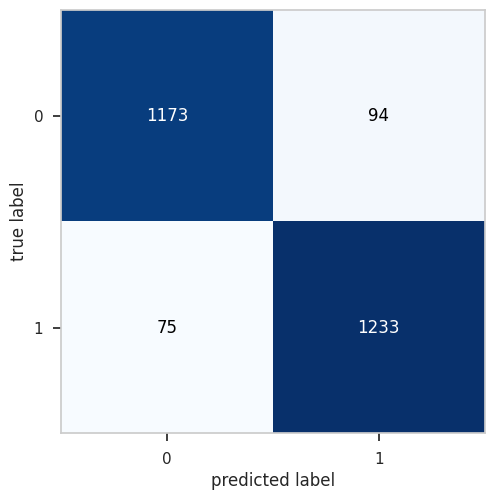

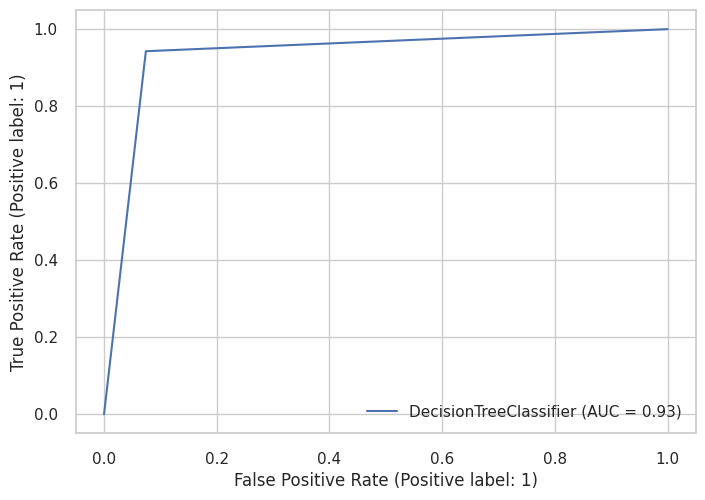

In [ ]:
# Decision Tree Classifier
model= DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.7732038834951457
ROC Area under Curve = 0.7728618615574365
Recall score: 0.7943425076452599
Precision score: 0.7673559822747416
F1 score: 0.7806160781367393
****************************************


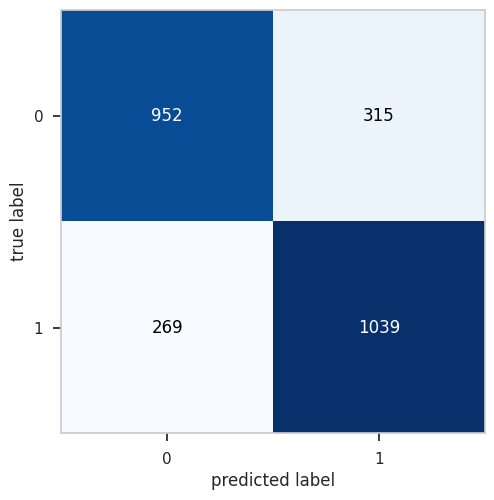

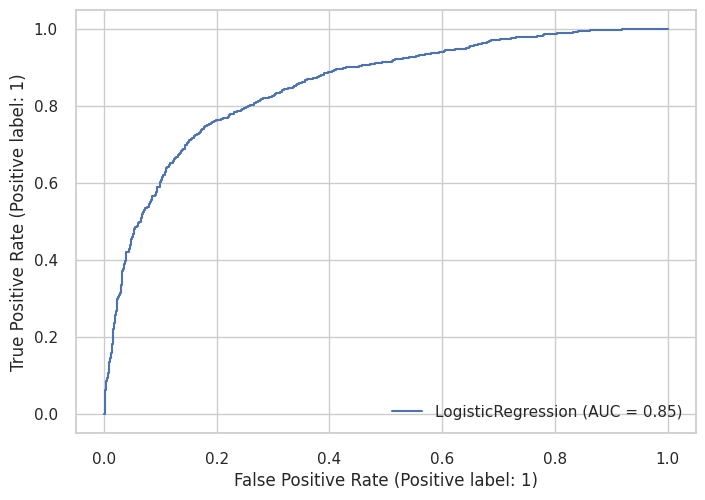

In [ ]:
# Logistic Regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.9009708737864077
ROC Area under Curve = 0.8999747169383239
Recall score: 0.9625382262996942
Precision score: 0.8593856655290102
F1 score: 0.9080418319509556
****************************************


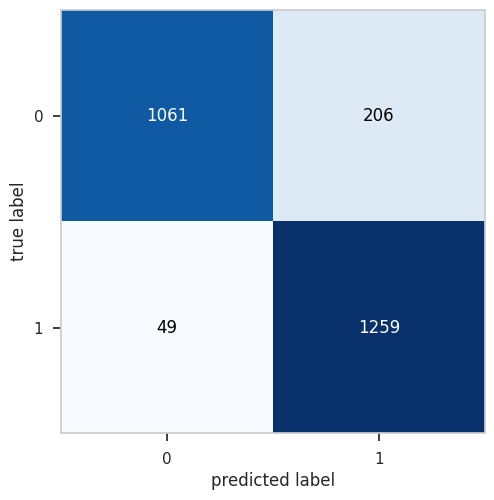

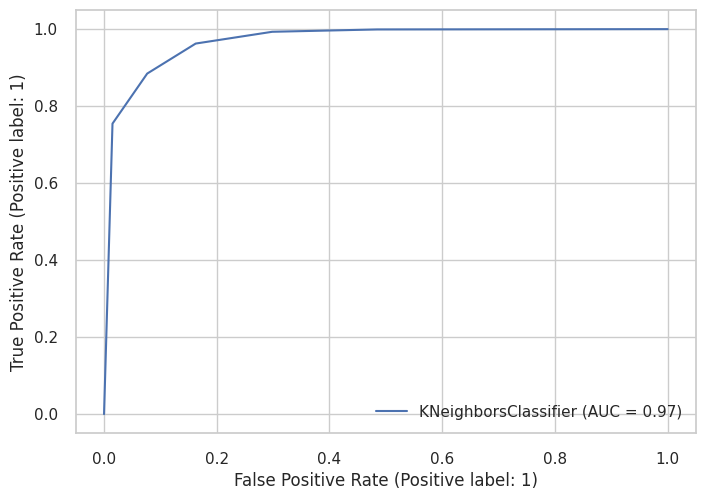

In [ ]:
# K Nearest Neighbors Classifier
model= KNeighborsClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.9697087378640776
ROC Area under Curve = 0.9694660265647138
Recall score: 0.9847094801223242
Precision score: 0.9569093610698366
F1 score: 0.9706103993971364
****************************************


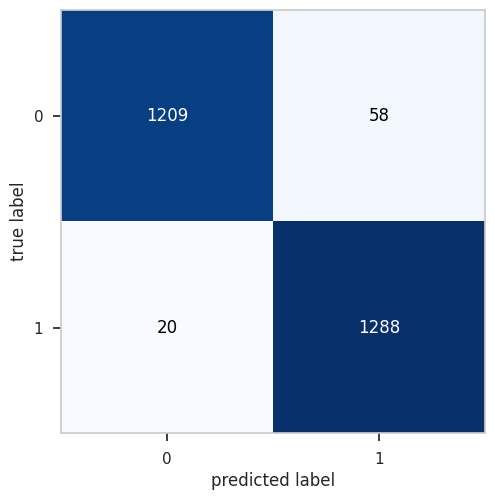

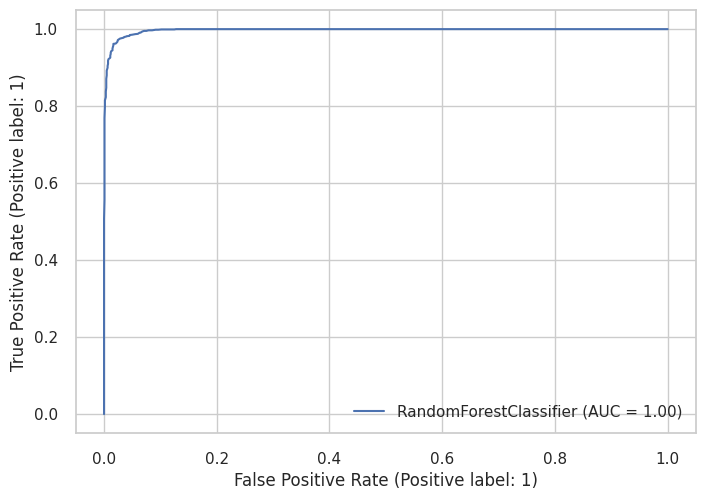

In [ ]:
# Random Forest Classifier
model= RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.8792233009708738
ROC Area under Curve = 0.8789514589352392
Recall score: 0.8960244648318043
Precision score: 0.8700816629547142
F1 score: 0.8828625235404898
****************************************


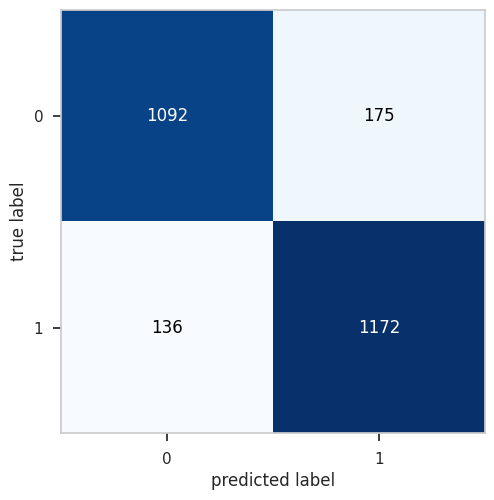

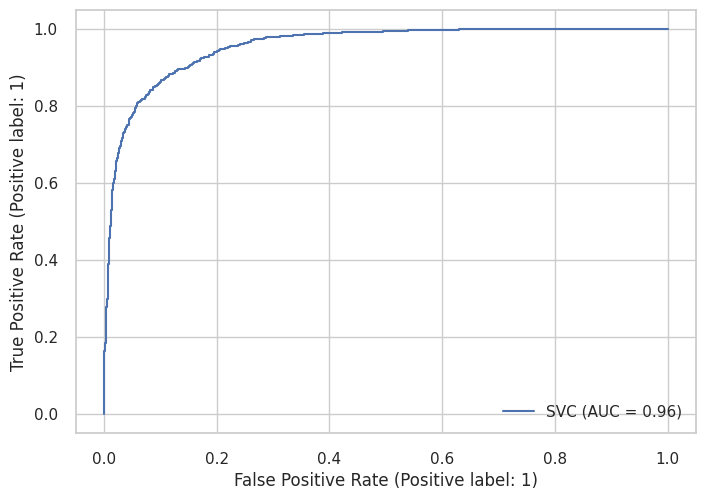

In [ ]:
# Support Vector Classifier
model= SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.9650485436893204
ROC Area under Curve = 0.964532510758878
Recall score: 0.9969418960244648
Precision score: 0.9381294964028777
F1 score: 0.9666419570051891
****************************************


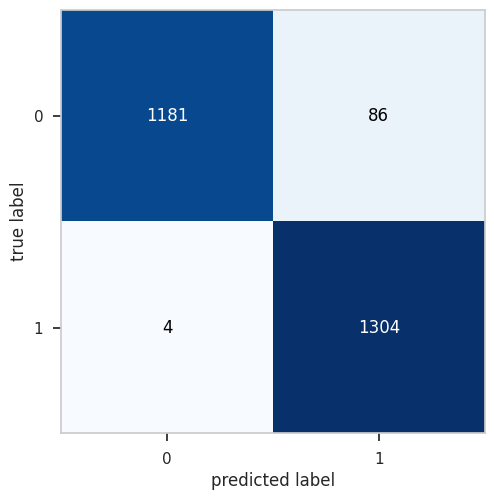

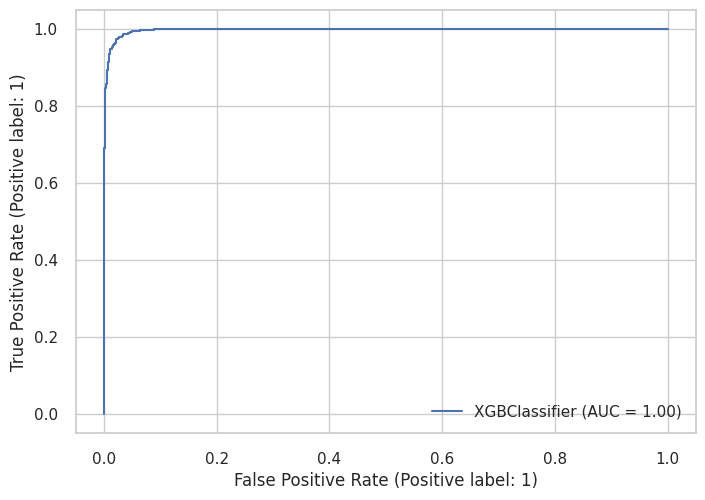

In [ ]:
# XGBosst Classifier
model= XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.8396116504854368
ROC Area under Curve = 0.8384762339220244
Recall score: 0.9097859327217125
Precision score: 0.8013468013468014
F1 score: 0.8521303258145363
****************************************


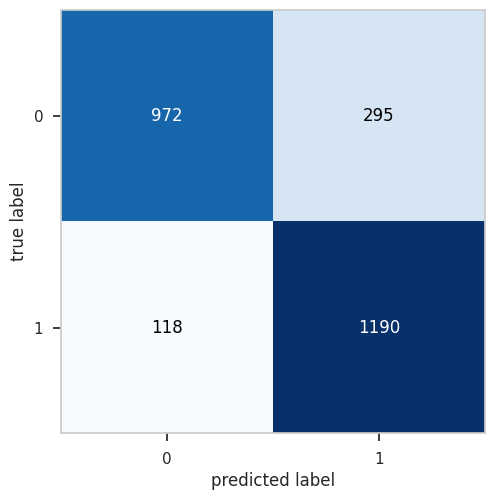

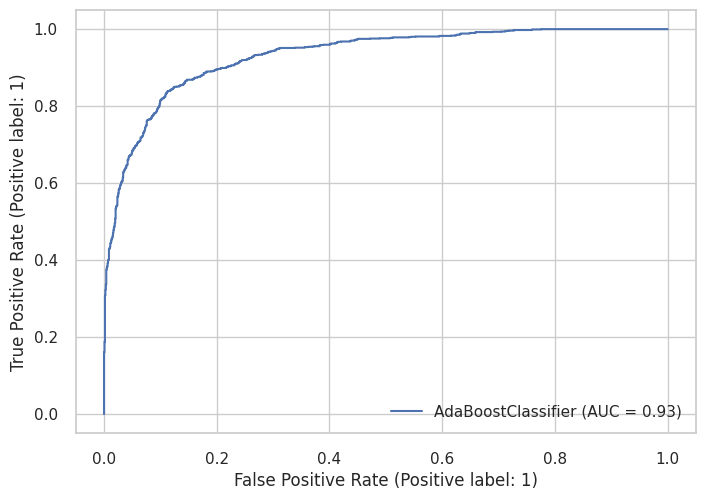

In [ ]:
# AdaBoost Classifier
model= AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc7 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc7))
# print(classification_report(y_test,y_pred,digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 40)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy for ANN = 0.9347572815533981
ROC Area under Curve for ANN = 0.9344438571211342
Recall score: 0.9097859327217125
Precision score: 0.8013468013468014
F1 score: 0.8521303258145363
****************************************


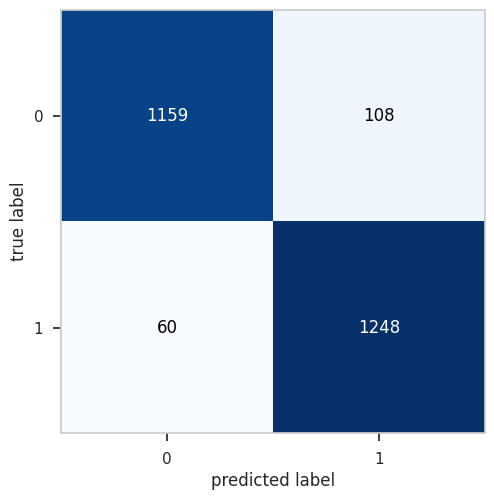

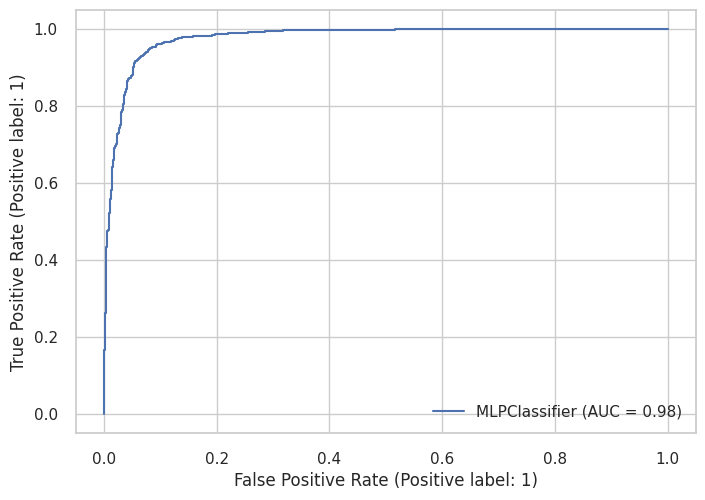

In [ ]:
# ANN Classifier
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ann_model.fit(x_train_scaled, y_train)
y_pred_ann = ann_model.predict(x_test_scaled)

# Evaluation metrics
accuracy_ann = accuracy_score(y_test, y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)

# Print metrics
print("Accuracy for ANN = {}".format(accuracy_ann))
print("ROC Area under Curve for ANN = {}".format(roc_auc_ann))
# print(classification_report(y_test, y_pred_ann, digits=5))
print('Recall score:', recall_score(y_test,y_pred))
print('Precision score:', precision_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_ann))
print('*' * 40)

# Plot ROC Curve
RocCurveDisplay.from_estimator(ann_model, x_test_scaled, y_test)


**Parameter Tuning**

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dt_clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Use the best model for predictions on the test set
y_pred = best_dt_model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)


Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy:  0.9126033726632827
Test Accuracy:  0.9180582524271844


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier with the best parameters
best_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Fit the model to the training data
best_dt_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = best_dt_model.predict(x_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.9180582524271844


Accuracy:  0.9180582524271844
AUC:  0.9175117484775858
Recall:  0.9518348623853211
Precision:  0.8937544867193108
F1 Score:  0.9218807848944837


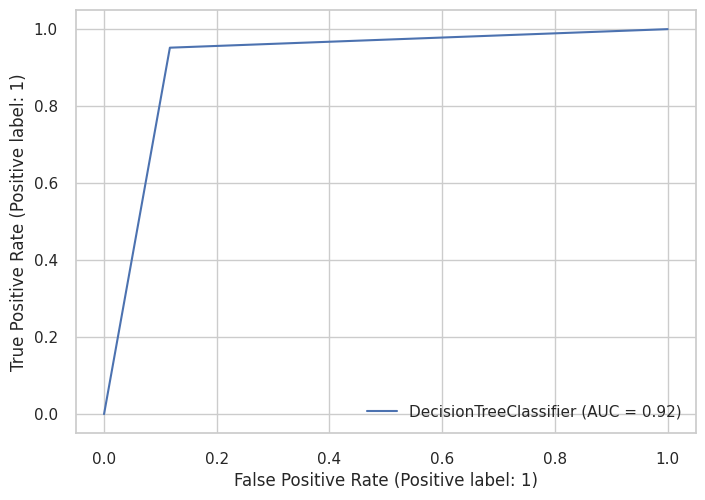

In [ ]:

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_model.predict(x_test_scaled)
y_prob_test = best_model.predict_proba(x_test_scaled)[:, 1]  # Only for models with predict_proba method

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_prob_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print or use the metrics as needed
print("Accuracy: ", accuracy)
print("AUC: ", auc)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_dt_model, x_test_scaled, y_test)

In [ ]:

# Create a Logistic Regression classifier
logistic_reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_logistic_reg = grid_search.best_estimator_

# Use the best model for predictions on the test set
y_pred_test = best_logistic_reg.predict(x_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)


Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.7652736679196989
Test Accuracy:  0.7724271844660194


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression classifier with the best parameters
best_logistic_reg = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    random_state=42  # You can set a random state for reproducibility
)

# Fit the model to the training data
best_logistic_reg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = best_logistic_reg.predict(x_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.7724271844660194


Test Accuracy:  0.7724271844660194
ROC Area Under Cured:  0.9175117484775858
Recall:  0.7920489296636085
Precision:  0.7674074074074074
F1 Score:  0.7795334838224229


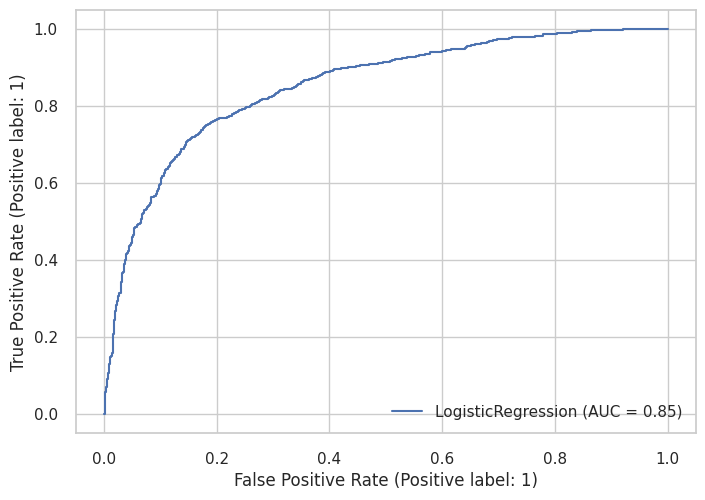

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_test = best_logistic_reg.predict(x_test_scaled)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_prob_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Accuracy: ", accuracy)
print("ROC Area Under Cured: ", auc)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_logistic_reg, x_test_scaled, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Use the best model for predictions on the test set
y_pred_test = best_knn_model.predict(x_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)


Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Accuracy:  0.9237552263014072
Test Accuracy:  0.9650485436893204


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Best parameters obtained from tuning
best_knn_params = {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

# Create KNN classifier with the best parameters
best_knn_model = KNeighborsClassifier(**best_knn_params)

# Train the model on the training set
best_knn_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test_scaled)

# Evaluate the model
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
print("Test Accuracy for KNN: ", test_accuracy_knn)


Test Accuracy for KNN:  0.9650485436893204


KNN Accuracy:  0.9452427184466019
KNN Recall:  0.9923547400611621
KNN Precision:  0.9083275017494752
KNN F1 Score:  0.948483741322616


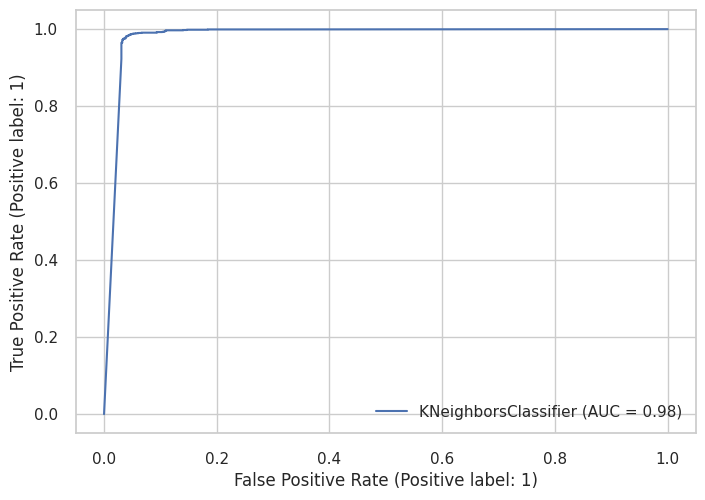

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

# Assuming you have your x_train, y_train, x_test, and y_test data ready

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Set up KNN classifier
knn_model = KNeighborsClassifier()

# Set up parameter grid for GridSearchCV (replace with your desired parameters)
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test_scaled)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
# Note: KNN does not have predict_proba method, so no AUC calculation

recall_knn = recall_score(y_test, y_pred_test_knn)
precision_knn = precision_score(y_test, y_pred_test_knn)
f1_knn = f1_score(y_test, y_pred_test_knn)

# Print or use the metrics as needed
print("KNN Accuracy: ", accuracy_knn)
print("KNN Recall: ", recall_knn)
print("KNN Precision: ", precision_knn)
print("KNN F1 Score: ", f1_knn)

# Plot ROC Curve (choose an appropriate threshold for binary classification)
RocCurveDisplay.from_estimator(best_knn_model, x_test_scaled, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_random_forest = grid_search.best_estimator_

# Use the best model for predictions on the test set
y_pred_test_rf = best_random_forest.predict(x_test_scaled)

# Calculate test accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print("Test Accuracy: ", test_accuracy_rf)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy:  0.9618781950284697
Test Accuracy:  0.9766990291262136


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier with the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model to the training data
best_rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(x_test_scaled)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy for Random Forest: ", test_accuracy_rf)


Test Accuracy for Random Forest:  0.9786407766990292


Random Forest Accuracy:  0.9766990291262136
Random Forest AUC:  0.9979278750884002
Random Forest Recall:  0.981651376146789
Random Forest Precision:  0.9727272727272728
Random Forest F1 Score:  0.9771689497716896


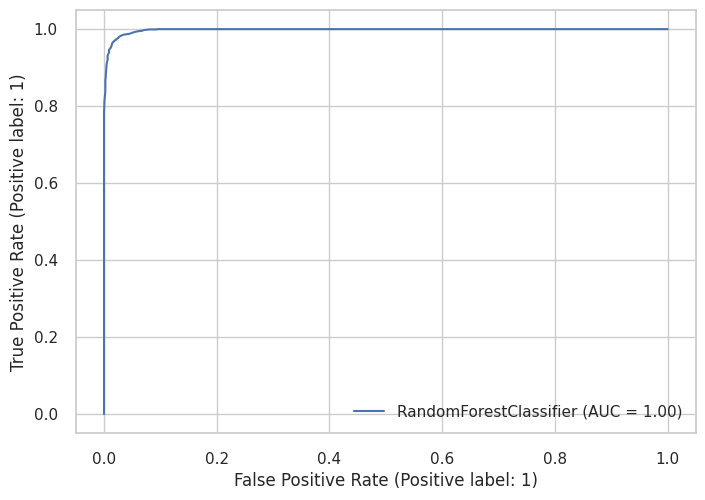

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

# Assuming grid_search is your GridSearchCV object

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test_rf = best_model.predict(x_test_scaled)
y_prob_test_rf = best_model.predict_proba(x_test_scaled)[:, 1]  # Only for models with predict_proba method

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
auc_rf = roc_auc_score(y_test, y_prob_test_rf)
recall_rf = recall_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf)
f1_rf = f1_score(y_test, y_pred_test_rf)

# Print or use the metrics as needed
print("Random Forest Accuracy: ", accuracy_rf)
print("Random Forest AUC: ", auc_rf)
print("Random Forest Recall: ", recall_rf)
print("Random Forest Precision: ", precision_rf)
print("Random Forest F1 Score: ", f1_rf)

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(best_model, x_test_scaled, y_test)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Create an SVM classifier
svm_clf = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_svm = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model: ", accuracy)


Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy:  0.9592148573676282
Test Accuracy with Best Model:  0.9829126213592233


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use the best parameters obtained from GridSearchCV
best_svm = SVC(C=10, gamma=0.1, kernel='rbf')

# Fit the SVM model to the training data
best_svm.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(x_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model: ", test_accuracy)


Test Accuracy with Best Model:  0.9829126213592233


Test Accuracy:  0.9829126213592233
ROC Area Under Cured:  0.9175117484775858
Recall:  0.9908256880733946
Precision:  0.9759036144578314
F1 Score:  0.9833080424886192


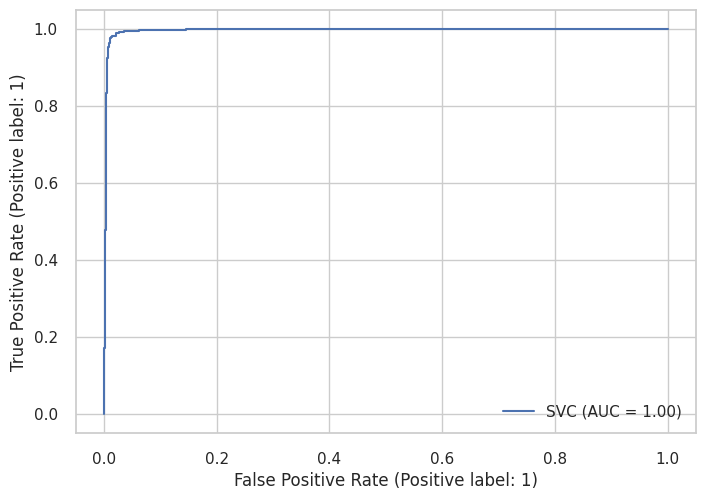

In [ ]:

# Make predictions on the test set
y_pred_test = best_svm.predict(x_test_scaled)

# Calculate additional evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_test)
auc_svm = roc_auc_score(y_test, y_prob_test)
recall_svm = recall_score(y_test, y_pred_test)
precision_svm = precision_score(y_test, y_pred_test)
f1_svm = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Accuracy: ", accuracy_svm)
print("ROC Area Under Cured: ", auc_svm)
print("Recall: ", recall_svm)
print("Precision: ", precision_svm)
print("F1 Score: ", f1_svm)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_svm, x_test_scaled, y_test)


In [ ]:

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_xgb_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy for Best XGBoost Model: ", accuracy)


Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Best Accuracy:  0.9688693732627831
Test Accuracy for Best XGBoost Model:  0.9844660194174757


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Use the best parameters obtained from grid search
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}

# Create an XGBClassifier with the best parameters
best_xgb_model = XGBClassifier(
    objective='binary:logistic',
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)

# Train the model on the training data
best_xgb_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test_scaled)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy for Best XGBoost Model: ", accuracy)


Test Accuracy for Best XGBoost Model:  0.9844660194174757


Test Accuracy: 0.9844660194174757
ROC AUC Score: 0.9843383802910388
Recall: 0.9923547400611621
Precision: 0.9774096385542169
F1 Score: 0.9848254931714718


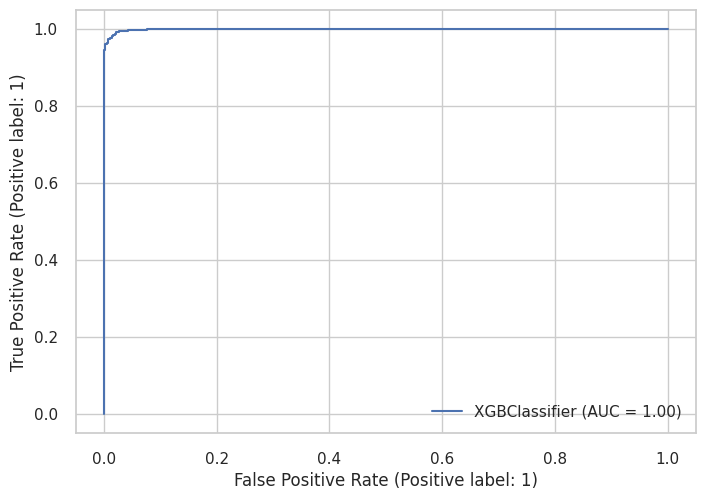

In [ ]:

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_test)
precision_xgb = precision_score(y_test, y_pred_test)
recall_xgb = recall_score(y_test, y_pred_test)
f1_xgb = f1_score(y_test, y_pred_test)
roc_auc_xgb = roc_auc_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Accuracy:", accuracy_xgb)
print("ROC AUC Score:", roc_auc_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1 Score:", f1_xgb)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_xgb_model, x_test_scaled, y_test)

In [ ]:

# Define the AdaBoostClassifier
ada_clf = AdaBoostClassifier()

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    # Add more parameters as needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(ada_clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_ada_clf = grid_search.best_estimator_

# Train the model on the training data
best_ada_clf.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = best_ada_clf.predict(x_test_scaled)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy for Best AdaBoost Model: ", accuracy)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy:  0.8779755774264011
Test Accuracy for Best AdaBoost Model:  0.8889320388349514


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Use the best parameters obtained from grid search
best_params = {'learning_rate': 0.5, 'n_estimators': 150}

# Create AdaBoostClassifier with the best parameters
best_ada_clf = AdaBoostClassifier(**best_params)

# Fit the model to your training data
best_ada_clf.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_test_ada = best_ada_clf.predict(x_test_scaled)

# Evaluate the performance of the best AdaBoost model on the test set
from sklearn.metrics import accuracy_score

test_accuracy_ada = accuracy_score(y_test, y_pred_test_ada)
print(f"Test Accuracy for Best AdaBoost Model: {test_accuracy_ada}")

Test Accuracy for Best AdaBoost Model: 0.8889320388349514


Accuracy: 0.8889320388349514
ROC AUC Score: 0.9568640193671872
Recall: 0.8753822629969419
Precision: 0.9029968454258676
F1 Score: 0.8889751552795031


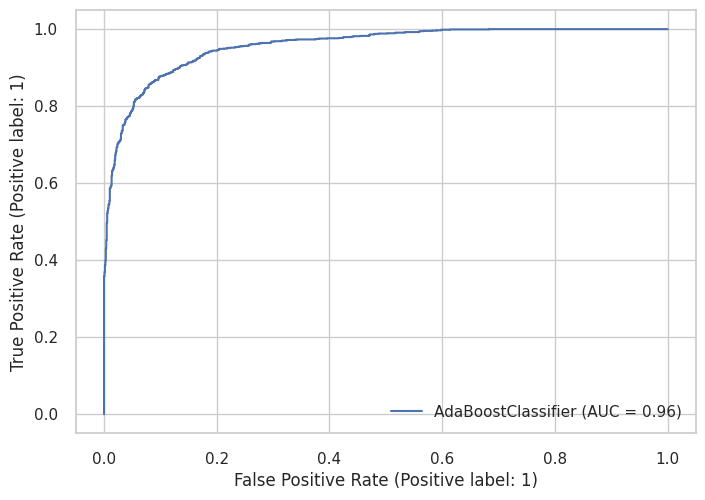

In [ ]:

# Make predictions on the test set
y_pred_test_ada = best_ada_clf.predict(x_test_scaled)

# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_test_ada)
print("Accuracy:", accuracy_ada)

# ROC AUC score (applicable for binary classification)
roc_auc_ada = roc_auc_score(y_test, best_ada_clf.predict_proba(x_test_scaled)[:, 1])
print("ROC AUC Score:", roc_auc_ada)

# Recall
recall_ada = recall_score(y_test, y_pred_test_ada)
print("Recall:", recall_ada)

# Precision
precision_ada = precision_score(y_test, y_pred_test_ada)
print("Precision:", precision_ada)

# F1 score
f1_ada = f1_score(y_test, y_pred_test_ada)
print("F1 Score:", f1_ada)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_ada_clf, x_test_scaled, y_test)

In [ ]:

# Define a smaller parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'max_iter': [100, 200],
}

# Create an MLPClassifier
ann_clf = MLPClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(ann_clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_ann = grid_search.best_estimator_

# Now you can use best_ann for further evaluation
y_pred_test_ann = best_ann.predict(x_test_scaled)

print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test_ann)}')


Best Parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best Accuracy:  0.9052772822118804
Test Accuracy: 0.9553398058252427


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

# Create an MLPClassifier with the best parameters
best_ann = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    max_iter=200,
    solver='adam',
    random_state=42  # You can add the random_state if needed
)

# Fit the model to the training data
best_ann.fit(x_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_train_ann = best_ann.predict(x_train_scaled)
y_pred_test_ann = best_ann.predict(x_test_scaled)

# Evaluate the performance of the model
test_accuracy = accuracy_score(y_test, y_pred_test_ann)

print(f'Test Accuracy: {test_accuracy}')


Test Accuracy: 0.9553398058252427


Accuracy: 0.9553398058252427
ROC Area Under Curve: 0.9551367457622211
Recall: 0.9678899082568807
Precision: 0.9454817027632562
F1 Score: 0.9565545901020023


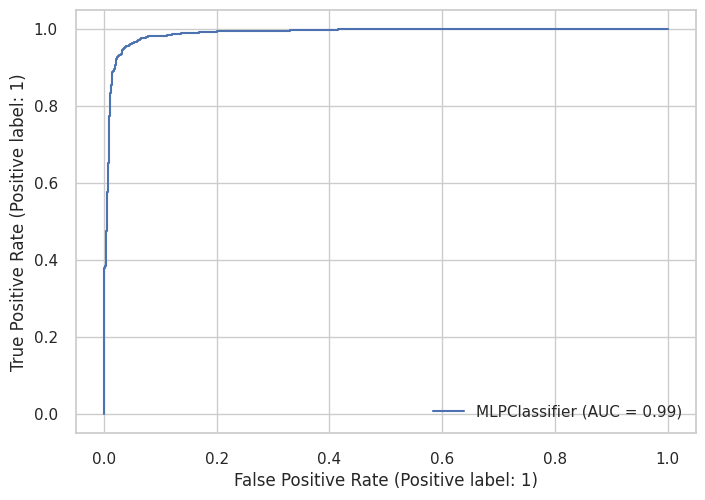

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Use the best_ann model obtained from the grid search
y_pred_test_ann = best_ann.predict(x_test_scaled)

# Accuracy
accuracy_ann = accuracy_score(y_test, y_pred_test_ann)

#AUC
roc_auc_ann = roc_auc_score(y_test, y_pred_test_ann)

# Recall
recall_ann = recall_score(y_test, y_pred_test_ann)

# Precision
precision_ann = precision_score(y_test, y_pred_test_ann)

# F1 Score
f1_ann = f1_score(y_test, y_pred_test_ann)

# Print the results
print("Accuracy:", accuracy_ann)
print("ROC Area Under Curve:", roc_auc_ann)
print("Recall:", recall_ann)
print("Precision:", precision_ann)
print("F1 Score:", f1_ann)

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_ann, x_test_scaled, y_test)
